# Game Industry Analytics: Evolução, Estratégias e Tendências de Mercado

### 🎯 Sobre o Projeto
Este projeto consiste em uma **Análise Exploratória de Dados (EDA)** focada na indústria global de videogames. O objetivo é transformar dados brutos em inteligência de mercado, identificando padrões de consumo, ciclos de vida de consoles e estratégias de sucesso das principais publicadoras.

O dataset abrange um período histórico crucial de **1980 a 2016**, permitindo observar a ascensão e queda de plataformas lendárias, a evolução dos gêneros favoritos do público e as diferenças culturais entre os mercados ocidentais e orientais.

#### 📂 Dicionário de Dados
O conjunto de dados original contém 16.598 registros. Para facilitar a interpretação e análise, as colunas foram renomeadas e padronizadas da seguinte forma:

* **Rank_venda:** Posição do jogo no ranking global de vendas.
* **Jogo:** Título comercial do game.
* **Plataforma:** Console ou sistema para o qual o jogo foi lançado (ex: PS2, X360, Wii).
* **Ano_lancamento:** Ano em que o título chegou ao mercado.
* **Genero:** Categoria principal do jogo (ex: Ação, Esportes, RPG).
* **Publicadora:** Empresa responsável pela distribuição (ex: Nintendo, Electronic Arts).
* **Vendas_America_Norte:** Volume de vendas na América do Norte (em milhões de unidades).
* **Vendas_Europa:** Volume de vendas na Europa (em milhões de unidades).
* **Vendas_Japao:** Volume de vendas no Japão (em milhões de unidades).
* **Vendas_outras_regioes:** Volume de vendas no restante do mundo (em milhões de unidades).
* **Total_vendas:** Somatório global de todas as vendas (em milhões de unidades).

In [3]:
# Bibliotecas importadas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.ticker import FuncFormatter
import seaborn as sns
from IPython.display import display, Markdown
import warnings
warnings.filterwarnings("ignore")

In [4]:
original_df = pd.read_csv("vendas_games.csv")

In [5]:
original_df.head(3)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82


In [6]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [7]:
limpeza_df = original_df.copy()

In [8]:
# Mostra linhas onde TODAS as colunas são NaN
linhas_vazias = limpeza_df[limpeza_df.isnull().all(axis=1)]
display(linhas_vazias)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales


In [9]:
limpeza_df.duplicated().sum()

0

In [10]:
print(limpeza_df.Genre.unique())
print(f'Total de generos: {len(limpeza_df["Genre"].unique())}')

['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy']
Total de generos: 12


In [11]:
limpeza_df.columns = [
    'Rank_venda', 'Jogo', 'Plataforma', 
    'Ano_lancamento', 'Genero','Publicadora', 
    'Vendas_America_Norte', 'Vendas_Europa', 
    'Vendas_Japao', 'Vendas_outras_regioes', 'Total_vendas'
]
limpeza_df.Genero.unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [12]:
# Renomeando os Gêneros:
limpeza_df["Genero"] = limpeza_df["Genero"].replace(
    {
    'Sports': 'Esporte',
    'Platform' : 'Plataforma',
    'Racing' : 'Corrida', 
    'Role-Playing' : 'RPG',
    'Puzzle' : 'Quebra\ncabeça', 
    'Misc' : 'Diversos', 
    'Shooter' : 'Tiro',
    'Simulation' : 'Simulador', 
    'Action' : 'Ação', 
    'Fighting' : 'Luta', 
    'Adventure' : 'Aventura',
    'Strategy' : 'Estratégia'
    }
)

In [13]:
print(limpeza_df.Plataforma.unique())
print(f'Total de Plataformas: {len(limpeza_df["Plataforma"].unique())}')

['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' '3DS' 'PS4' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'GC' 'WiiU' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']
Total de Plataformas: 31


In [14]:
# Renomeando as Plataformas
limpeza_df["Plataforma"] = limpeza_df["Plataforma"].replace(
{
    'Wii' : 'Nintendo\nWii', 'NES' : 'Nintendinho ', 'GB' : 'Game Boy','DS': 'Nintendo\nDS', 
    'X360' : 'Xbox 360', 'SNES' : 'Super\nNintendo', 'GBA' : 'Game Boy\n Advanced','3DS' :'Nitendo\n3DS', 
    'N64' : 'Nintendo 64', 'PS' : 'PS1', 'XB' : 'Xbox', '2600' : 'Atari 2600', 'XOne' : 'Xbox One', 
    'GC' : 'GameCube', 'WiiU' : 'Nintendo\n WiiU', 'GEN' : 'Sega\nGenesis', 'DC' : 'Dreamcast', 
    'PSV' : 'PS Vita', 'SAT' : 'Sega\nSaturn', 'SCD' : 'Sega CD', 'WS' : 'WonderSwan', 
    'NG' : 'Neo Geo', 'TG16' : 'TurboGrafx-16', 'GG' : 'Game Gear', 'PCFX' : 'PC-FX'
}
)
limpeza_df.Plataforma.unique()

array(['Nintendo\nWii', 'Nintendinho ', 'Game Boy', 'Nintendo\nDS',
       'Xbox 360', 'PS3', 'PS2', 'Super\nNintendo', 'Game Boy\n Advanced',
       'Nitendo\n3DS', 'PS4', 'Nintendo 64', 'PS1', 'Xbox', 'PC',
       'Atari 2600', 'PSP', 'Xbox One', 'GameCube', 'Nintendo\n WiiU',
       'Sega\nGenesis', 'Dreamcast', 'PS Vita', 'Sega\nSaturn', 'Sega CD',
       'WonderSwan', 'Neo Geo', 'TurboGrafx-16', '3DO', 'Game Gear',
       'PC-FX'], dtype=object)

In [15]:
limpeza_df.head(3)

,Rank_venda,Jogo,Plataforma,Ano_lancamento,Genero,Publicadora,Vendas_America_Norte,Vendas_Europa,Vendas_Japao,Vendas_outras_regioes,Total_vendas
0,1,Wii Sports,Nintendo\nWii,2006.0,Esporte,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,Nintendinho,1985.0,Plataforma,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Nintendo\nWii,2008.0,Corrida,Nintendo,15.85,12.88,3.79,3.31,35.82


### A partir daqui vou começar a tratar os nulos e descobrir se consigo recuperar alguns dados faltantes.

In [17]:
limpeza_df.isnull().sum()

Rank_venda                 0
Jogo                       0
Plataforma                 0
Ano_lancamento           271
Genero                     0
Publicadora               58
Vendas_America_Norte       0
Vendas_Europa              0
Vendas_Japao               0
Vendas_outras_regioes      0
Total_vendas               0
dtype: int64

In [18]:
# Mostra apenas as linhas que têm pelo menos 1 valor nulo
linhas_com_nulos = limpeza_df[limpeza_df.isnull().any(axis=1)]
with pd.option_context("display.max_rows", 3):
    display(linhas_com_nulos)

,Rank_venda,Jogo,Plataforma,Ano_lancamento,Genero,Publicadora,Vendas_America_Norte,Vendas_Europa,Vendas_Japao,Vendas_outras_regioes,Total_vendas
179,180,Madden NFL 2004,PS2,NaN,Esporte,Electronic Arts,4.26,0.26,0.01,0.71,5.23
...,...,...,...,...,...,...,...,...,...,...,...
16553,16556,Bound By Flame,Xbox 360,2014.0,RPG,NaN,0.00,0.01,0.00,0.00,0.01


In [19]:
with pd.option_context("display.max_columns", None):
    display(limpeza_df['Plataforma'].value_counts().to_frame().T)

Plataforma,Nintendo\nDS,PS2,PS3,Nintendo\nWii,Xbox 360,PSP,PS1,PC,Xbox,Game Boy\n Advanced,GameCube,Nitendo\n3DS,PS Vita,PS4,Nintendo 64,Super\nNintendo,Xbox One,Sega\nSaturn,Nintendo\n WiiU,Atari 2600,Nintendinho,Game Boy,Dreamcast,Sega\nGenesis,Neo Geo,Sega CD,WonderSwan,3DO,TurboGrafx-16,Game Gear,PC-FX
count,2163,2161,1329,1325,1265,1213,1196,960,824,822,556,509,413,336,319,239,213,173,143,133,98,98,52,27,12,6,6,3,2,1,1


In [20]:
# Conta quantas vezes cada plataforma aparece na sua lista de nulos
ranking_nulos_pla = linhas_com_nulos['Plataforma'].value_counts().to_frame()
# print(f"Total Plaformas com dados ausentes: {ranking_nulos_pla.sum()}")
display(ranking_nulos_pla.T)

Plataforma,Game Boy\n Advanced,Nintendo\nWii,PS2,Nintendo\nDS,Xbox 360,PS3,PC,Xbox,Atari 2600,PSP,GameCube,Nitendo\n3DS,PS1,Nintendo 64,PS Vita,Game Boy
count,36,35,34,32,31,25,22,21,17,16,14,10,7,3,3,1


In [21]:
ranking_nulos_ano = linhas_com_nulos['Ano_lancamento'].value_counts().to_frame()
texto_0 = (f""" ### Total de Anos de lançamento com dados ausentes: {ranking_nulos_ano.sum()}""")
display(Markdown(texto_0))
ranking_nulos_ano.T

 ### Total de Anos de lançamento com dados ausentes: count    36
dtype: int64

Ano_lancamento,2004.0,2005.0,2011.0,2010.0,2012.0,2016.0,2014.0,2007.0
count,19,5,3,2,2,2,2,1


In [22]:
pla_total = ranking_nulos_pla.values.sum()
ano_total = ranking_nulos_ano.values.sum()

texto_1 = (f"""
# Até aqui a base possui: 
### {pla_total} dados ausentes para a coluna de ['Plataformas'] e {ano_total} para a coluna de ['Ano_lancamento'].
""")
display(Markdown(texto_1))


# Até aqui a base possui: 
### 307 dados ausentes para a coluna de ['Plataformas'] e 36 para a coluna de ['Ano_lancamento'].


In [23]:
# Agrupa por Plataforma e soma apenas onde é True (nulo) nas colunas específicas
analise_nulos = limpeza_df.groupby('Plataforma')[['Publicadora', 'Ano_lancamento']].apply(lambda x: x.isnull().sum())
# Filtra para mostrar apenas as plataformas que tem algum erro (tira as que estão zeradas/perfeitas)
analise_nulos = analise_nulos[(analise_nulos.T != 0).any()]
# Ordena pelos que tem mais anos faltando (opcional)
analise_nulos = analise_nulos.sort_values(by='Ano_lancamento', ascending=False)

display(analise_nulos.T)

Plataforma,Nintendo\nWii,PS2,Nintendo\nDS,Xbox 360,PS3,Xbox,Atari 2600,PC,PSP,GameCube,Game Boy\n Advanced,Nitendo\n3DS,PS1,Nintendo 64,Game Boy,PS Vita
Publicadora,1,2,7,4,3,0,0,6,2,0,26,2,3,0,0,2
Ano_lancamento,35,34,30,30,25,21,17,17,16,14,11,9,7,3,1,1


In [24]:
filtro_1 = (limpeza_df["Plataforma"] == 'Nintendo Wii') & (limpeza_df.Publicadora.isnull())

display(limpeza_df[filtro_1])

,Rank_venda,Jogo,Plataforma,Ano_lancamento,Genero,Publicadora,Vendas_America_Norte,Vendas_Europa,Vendas_Japao,Vendas_outras_regioes,Total_vendas


In [25]:
# Correção Manual demonstrativa (Índice 5302)
limpeza_df.loc[5302, 'Publicadora'] = 'Namco Bandai Games'  # Fonte da pesquisa: (Google) Publicadora JP: Namco Bandai Games
limpeza_df.loc[5302, 'Ano_lancamento'] = 2007.0             # Fonte da pesquisa: (Google) Data de lançamento JP: 2007

# Verificando se a linha foi corrigida
display(limpeza_df.loc[[5302]])

,Rank_venda,Jogo,Plataforma,Ano_lancamento,Genero,Publicadora,Vendas_America_Norte,Vendas_Europa,Vendas_Japao,Vendas_outras_regioes,Total_vendas
5302,5304,Dragon Ball Z: Budokai Tenkaichi 2 (JP sales),Nintendo\nWii,2007.0,Ação,Namco Bandai Games,0.15,0.05,0.14,0.01,0.35


### 🔧 Demonstração de Correção Pontual (Enriquecimento de Dados)

Durante a auditoria de qualidade por plataforma, identificamos um registro específico na plataforma **Nintendo Wii** com dados ausentes de *Publicadora* e *Ano* (Index 5302: *Dragon Ball Z: Budokai Tenkaichi 2 (JP sales)*).

**Ação Tomada:**
Para fins de demonstração de capacidade técnica de tratamento individual (`.loc`), realizei uma pesquisa externa para recuperar os dados reais deste título:
* **Publicadora:** Identificada como *Namco Bandai Games*.
* **Ano de Lançamento:** Identificado como *2007* (Lançamento japonês).

**Nota Estratégica do Projeto:**
Embora seja tecnicamente possível corrigir linha por linha pesquisando em fontes externas, **optei por realizar essa correção manual apenas neste exemplo**.
Em projetos de Data Science, é crucial balancear o tempo gasto no ETL com o tempo disponível para análise. Corrigir manualmente centenas de registros de menor impacto desviaria o foco do objetivo principal deste projeto, que é a **Análise Exploratória de Dados (EDA)** e visualização de tendências de mercado.

In [27]:
with pd.option_context("display.max_rows", 4):
    display(limpeza_df[limpeza_df["Jogo"].str.contains("20")])

,Rank_venda,Jogo,Plataforma,Ano_lancamento,Genero,Publicadora,Vendas_America_Norte,Vendas_Europa,Vendas_Japao,Vendas_outras_regioes,Total_vendas
92,93,Star Wars Battlefront (2015),PS4,2015.0,Tiro,Electronic Arts,2.93,3.29,0.22,1.23,7.67
179,180,Madden NFL 2004,PS2,NaN,Esporte,Electronic Arts,4.26,0.26,0.01,0.71,5.23
...,...,...,...,...,...,...,...,...,...,...,...
16558,16561,Pro Evolution Soccer 2008,PC,2007.0,Esporte,Konami Digital Entertainment,0.00,0.01,0.00,0.00,0.01
16570,16573,Farming 2017 - The Simulation,PS4,2016.0,Simulador,UIG Entertainment,0.00,0.01,0.00,0.00,0.01


In [28]:
# DIAGNÓSTICO INICIAL (O "ANTES")
nulos_antes = limpeza_df['Ano_lancamento'].isnull().sum()
texto_2 = (f"""## 📉 Total de Anos vazios ANTES da recuperação: {nulos_antes}""")
display(Markdown(texto_2))

# EXTRAÇÃO E PREENCHIMENTO
# 1. Extração do ano do título (Coluna Auxiliar)
limpeza_df['Ano_lancamento_2'] = limpeza_df['Jogo'].str.extract(r'(20\d{2})')

# 2. Vamos ver QUANTOS candidatos a salvação nós temos?
# Filtramos: Quem tem 'Ano_lancamento' VAZIO mas 'Ano_lancamento_2' CHEIO?
candidatos_salvacao = limpeza_df[limpeza_df['Ano_lancamento'].isnull() & limpeza_df['Ano_lancamento_2'].notnull()]
texto_3 = (f"""## 🕵️ Encontramos {len(candidatos_salvacao)} jogos que podem ser salvos pelo título.""")
display(Markdown(texto_3))

# 3. Aplicando o preenchimento (O fillna seguro)
limpeza_df['Ano_lancamento'] = limpeza_df['Ano_lancamento'].fillna(limpeza_df['Ano_lancamento_2'])

# 4. Convertendo para número
limpeza_df['Ano_lancamento'] = pd.to_numeric(limpeza_df['Ano_lancamento'])

# RELATÓRIO FINAL (O "DEPOIS")
nulos_depois = limpeza_df['Ano_lancamento'].isnull().sum()
recuperados = nulos_antes - nulos_depois

texto_4 = (f"""## ✅ Sucesso! Foram recuperados {recuperados} anos de lançamento.
## 📉 Total de Anos vazios AGORA: {nulos_depois}""")
display(Markdown(texto_4))

## 📉 Total de Anos vazios ANTES da recuperação: 270

## 🕵️ Encontramos 17 jogos que podem ser salvos pelo título.

## ✅ Sucesso! Foram recuperados 17 anos de lançamento.
## 📉 Total de Anos vazios AGORA: 253

In [29]:
# Mostrar amostras do que foi recuperado
display(candidatos_salvacao[['Jogo', 'Ano_lancamento_2']].head().T)

,179,377,470,1649,2586
Jogo,Madden NFL 2004,FIFA Soccer 2004,wwe Smackdown vs. Raw 2006,NASCAR Thunder 2003,PES 2009: Pro Evolution Soccer
Ano_lancamento_2,2004,2004,2006,2003,2009


In [30]:
# Conferência de integridade do SimCity 2000 (Deve manter 1992):
display(limpeza_df[limpeza_df['Jogo'].str.contains('SimCity 2000')].head(2))

,Rank_venda,Jogo,Plataforma,Ano_lancamento,Genero,Publicadora,Vendas_America_Norte,Vendas_Europa,Vendas_Japao,Vendas_outras_regioes,Total_vendas,Ano_lancamento_2
765,767,SimCity 2000,PC,1992.0,Simulador,Maxis,1.20,0.84,0.0,0.10,2.14,2000
1645,1647,SimCity 2000,PS1,1996.0,Simulador,Maxis,0.68,0.46,0.0,0.08,1.22,2000


In [31]:
display(limpeza_df[limpeza_df['Jogo'].str.contains('Madden NFL 2004')].head(1))

,Rank_venda,Jogo,Plataforma,Ano_lancamento,Genero,Publicadora,Vendas_America_Norte,Vendas_Europa,Vendas_Japao,Vendas_outras_regioes,Total_vendas,Ano_lancamento_2
179,180,Madden NFL 2004,PS2,2004.0,Esporte,Electronic Arts,4.26,0.26,0.01,0.71,5.23,2004


### Os demais dados ausentes serão tratados com técnicas de exclusão ou preenchimento em massa nas próximas etapas.

In [33]:
limpeza_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rank_venda             16598 non-null  int64  
 1   Jogo                   16598 non-null  object 
 2   Plataforma             16598 non-null  object 
 3   Ano_lancamento         16345 non-null  float64
 4   Genero                 16598 non-null  object 
 5   Publicadora            16541 non-null  object 
 6   Vendas_America_Norte   16598 non-null  float64
 7   Vendas_Europa          16598 non-null  float64
 8   Vendas_Japao           16598 non-null  float64
 9   Vendas_outras_regioes  16598 non-null  float64
 10  Total_vendas           16598 non-null  float64
 11  Ano_lancamento_2       846 non-null    object 
dtypes: float64(6), int64(1), object(5)
memory usage: 1.5+ MB


In [34]:
# Removendo a coluna auxiliar que não precisamos mais
limpeza_df = limpeza_df.drop(columns=['Ano_lancamento_2'])

In [35]:
# Removendo linhas que ainda possuem qualquer valor nulo (limpeza final)
limpeza_df = limpeza_df.dropna()
print(limpeza_df.isnull().sum())
print(f"Base final pronta para análise: {limpeza_df.shape[0]} linhas")

Rank_venda               0
Jogo                     0
Plataforma               0
Ano_lancamento           0
Genero                   0
Publicadora              0
Vendas_America_Norte     0
Vendas_Europa            0
Vendas_Japao             0
Vendas_outras_regioes    0
Total_vendas             0
dtype: int64
Base final pronta para análise: 16308 linhas


In [36]:
# transformando Ano de Lançamento em Int
limpeza_df['Ano_lancamento'] = limpeza_df['Ano_lancamento'].astype(int)

In [37]:
limpeza_df.head(2)

,Rank_venda,Jogo,Plataforma,Ano_lancamento,Genero,Publicadora,Vendas_America_Norte,Vendas_Europa,Vendas_Japao,Vendas_outras_regioes,Total_vendas
0,1,Wii Sports,Nintendo\nWii,2006,Esporte,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,Nintendinho,1985,Plataforma,Nintendo,29.08,3.58,6.81,0.77,40.24


In [38]:
limpeza_df["Publicadora"] = limpeza_df["Publicadora"].replace(
{'Microsoft Game Studios' : 'Microsoft\nGame Studios', 'Take-Two Interactive' : 'Take-Two\nInteractive',
'Sony Computer Entertainment' : 'Sony\nComputer Ent.', 'Sony Online Entertainment' : 'Sony\nOnline Ent.',
'Sony Computer Entertainment Europe' : 'Sony Computer\nEnt. Europe', 'Sony Computer Entertainment America' : 'Sony Computer\nEnt. America',
'Konami Digital Entertainment' : 'Konami\nDigital Ent.', 'Warner Bros. Interactive Entertainment' : 'Warner Bros.\nInteractive Ent.',
'Namco Bandai Games' : 'Namco\nBandai Games',
})

In [39]:
limpeza_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16308 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rank_venda             16308 non-null  int64  
 1   Jogo                   16308 non-null  object 
 2   Plataforma             16308 non-null  object 
 3   Ano_lancamento         16308 non-null  int32  
 4   Genero                 16308 non-null  object 
 5   Publicadora            16308 non-null  object 
 6   Vendas_America_Norte   16308 non-null  float64
 7   Vendas_Europa          16308 non-null  float64
 8   Vendas_Japao           16308 non-null  float64
 9   Vendas_outras_regioes  16308 non-null  float64
 10  Total_vendas           16308 non-null  float64
dtypes: float64(5), int32(1), int64(1), object(4)
memory usage: 1.4+ MB


In [40]:
# Filtrando apenas os anos suspeitos
dados_recentes = limpeza_df[limpeza_df['Ano_lancamento'] >= 2017]

# Contando quantos jogos e o total de vendas
qtd_jogos = dados_recentes.shape[0]
total_vendas_recentes = dados_recentes['Total_vendas'].sum()

print(f"Total de jogos registrados entre 2017 e 2020: {qtd_jogos}")
print(f"Soma total de vendas desses anos: {total_vendas_recentes:.2f} milhões")

# Vamos ver quais são esses jogos (só para curiosidade)
display(dados_recentes.head())

Total de jogos registrados entre 2017 e 2020: 4
Soma total de vendas desses anos: 0.34 milhões


,Rank_venda,Jogo,Plataforma,Ano_lancamento,Genero,Publicadora,Vendas_America_Norte,Vendas_Europa,Vendas_Japao,Vendas_outras_regioes,Total_vendas
5957,5959,Imagine: Makeup Artist,Nintendo\nDS,2020,Simulador,Ubisoft,0.27,0.0,0.00,0.02,0.29
14390,14393,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017,RPG,Sega,0.00,0.0,0.03,0.00,0.03
16241,16244,Phantasy Star Online 2 Episode 4: Deluxe Package,PS Vita,2017,RPG,Sega,0.00,0.0,0.01,0.00,0.01
16438,16441,Brothers Conflict: Precious Baby,PS Vita,2017,Ação,Idea Factory,0.00,0.0,0.01,0.00,0.01


In [41]:
# REMOVENDO OS ANOS INCOMPLETOS (2017 - 2020)
# Mantemos apenas os dados estritamente menores que 2017
limpeza_df = limpeza_df[limpeza_df['Ano_lancamento'] < 2017].reset_index(drop=True)

print(f"Limpeza concluída! Nova base vai até 2016. Total de linhas: {limpeza_df.shape[0]}")

Limpeza concluída! Nova base vai até 2016. Total de linhas: 16304


### ✂️ Ajuste de Escopo Temporal
Após análise exploratória, identificamos uma **inconsistência na coleta de dados** para o período de 2017 a 2020 (apenas 4 registros encontrados).
Para evitar distorções visuais e analíticas, optamos por **limitar o escopo do estudo até 2016**, garantindo que todas as conclusões sejam baseadas em anos com amostragem estatisticamente relevante.

### 🧹 Resumo do Tratamento de Dados
Nesta etapa de pré-processamento, realizei a padronização completa do dataset, traduzindo colunas e categorizando Gêneros e Plataformas. Diagnostiquei a presença de valores nulos (NaN) e apliquei uma estratégia híbrida de recuperação: **correção manual** para registros específicos (ex: *Dragon Ball Z*) e **extração automatizada via Regex** para recuperar o ano de lançamento a partir do título dos jogos. Ao final, eliminei registros inconsistentes e colunas auxiliares, resultando em uma base 100% íntegra para análise.

# 🏁 FIM DA LIMPEZA / INÍCIO DA ANÁLISE

In [45]:
# Criamos uma cópia independente para garantir a segurança dos dados tratados
df = limpeza_df.copy()

# Resetamos o índice
df = df.reset_index(drop=True)
txt_df_0 = (f" ### Base pronta para análise: {df.shape[0]} linhas e {df.shape[1]} colunas.")
display(Markdown(txt_df_0))

display(df.head())

 ### Base pronta para análise: 16304 linhas e 11 colunas.

,Rank_venda,Jogo,Plataforma,Ano_lancamento,Genero,Publicadora,Vendas_America_Norte,Vendas_Europa,Vendas_Japao,Vendas_outras_regioes,Total_vendas
0,1,Wii Sports,Nintendo\nWii,2006,Esporte,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,Nintendinho,1985,Plataforma,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Nintendo\nWii,2008,Corrida,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Nintendo\nWii,2009,Esporte,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,Game Boy,1996,RPG,Nintendo,11.27,8.89,10.22,1.00,31.37


In [46]:
# 📚 ORGANIZANDO AS VARIÁVEIS (Metadados)

# 1. Variáveis Categóricas (Qualitativas) # Usaremos para: Barplots, Agrupamentos, Contagens
categoricas = ['Jogo', 'Plataforma', 'Genero', 'Publicadora']

# 2. Variáveis Numéricas (Quantitativas) # Usaremos para: Histogramas, Correlação, Boxplots, Médias
numericas_discretas = ['Vendas_America_Norte', 'Vendas_Europa','Vendas_Japao', 'Vendas_outras_regioes', 'Total_vendas']

ordinais_numericas = ['Rank_venda', 'Ano_lancamento']

print("✅ Variáveis catalogadas com sucesso!")

✅ Variáveis catalogadas com sucesso!


In [47]:
with pd.option_context("float_format","{:.2f}".format):
    display(df[numericas_discretas].describe())

,Vendas_America_Norte,Vendas_Europa,Vendas_Japao,Vendas_outras_regioes,Total_vendas
count,16304.00,16304.00,16304.00,16304.00,16304.00
mean,0.27,0.15,0.08,0.05,0.54
std,0.82,0.51,0.31,0.19,1.57
min,0.00,0.00,0.00,0.00,0.01
25%,0.00,0.00,0.00,0.00,0.06
50%,0.08,0.02,0.00,0.01,0.17
75%,0.24,0.11,0.04,0.04,0.48
max,41.49,29.02,10.22,10.57,82.74


## A Desigualdade do Mundo dos Games
Olhe para a coluna Total_vendas:

Média: 0.54 (540 mil cópias).

Mediana: 0.17 (170 mil cópias).

A média é muito maior que a mediana! Isso prova que existem poucos jogos gigantescos (como o Wii Sports com 82.74) que puxam a média para cima, enquanto a grande maioria dos jogos vende pouco (menos de 170 mil).

In [49]:
display(df[categoricas].describe().T)

,count,unique,top,freq
Jogo,16304,11328,Need for Speed: Most Wanted,12
Plataforma,16304,31,PS2,2133
Genero,16304,12,Ação,3252
Publicadora,16304,576,Electronic Arts,1343


## Os Reis do Pedaço

Plataforma: O PS2 é o rei da quantidade, com 2133 jogos lançados.

Gênero: Ação é o gênero mais saturado do mercado (3253 jogos).

Jogo: "Need for Speed: Most Wanted" aparece 12 vezes! Isso confirma que ele foi lançado para quase tudo (PC, PS2, Xbox, GameCube, GBA, DS, etc.).

---------------

In [51]:
# jogos lançados para mais plataformas
df.groupby('Jogo',as_index = False)['Plataforma'].count().sort_values(
    'Plataforma', ascending = False).head(5)

,Jogo,Plataforma
6584,Need for Speed: Most Wanted,12
7637,Ratatouille,9
5034,LEGO Marvel Super Heroes,9
2874,FIFA 14,9
9792,The LEGO Movie Videogame,8


In [52]:
# Agrupando jogos pela soma de vendas total e organizando um ranking dos 10 mais vendidos
df.groupby('Jogo',as_index=False)['Total_vendas'].sum().sort_values(
    'Total_vendas',ascending = False).head(5)

,Jogo,Total_vendas
10852,Wii Sports,82.74
3652,Grand Theft Auto V,55.92
9203,Super Mario Bros.,45.31
9583,Tetris,35.84
5494,Mario Kart Wii,35.82


# Analises Gráficas

In [54]:
# Minha paleta personalizada
pal_cores = ['#ED9F83', '#19B096', '#845ec2', '#c34a36', '#0081cf',
             '#f9f871', '#008f7a', '#ff8066', '#4b4453','#d65db1']

# Cria uma lista de cores (destacando o líder e o último
def get_cores_destaque(quantidade):
    """
    Gera uma lista de cores onde:
    - A primeira é AZUL (Líder)
    - A última é VERMELHA (Último)
    - O resto é ROXO (Intermediários)
    """
    # 1. Cria uma lista toda roxa do tamanho pedido
    cores = ['#845EC2'] * quantidade    
    if quantidade > 0:          # 2. Se tiver pelo menos 1 barra, pinta a primeira de Azul
        cores[0] = '#2c73d2'   
    if quantidade > 1:         # 3. Se tiver mais de 1 barra, pinta a última de Vermelho
        cores[-1] = '#c34a36'
        
    return cores

## 📈 Evolução Temporal: Vendas Globais (1980 - 2016)
Este gráfico de série temporal apresenta o volume total de cópias vendidas anualmente. O objetivo é identificar os ciclos de vida da indústria, desde o início da era dos consoles domésticos até a transição digital. 

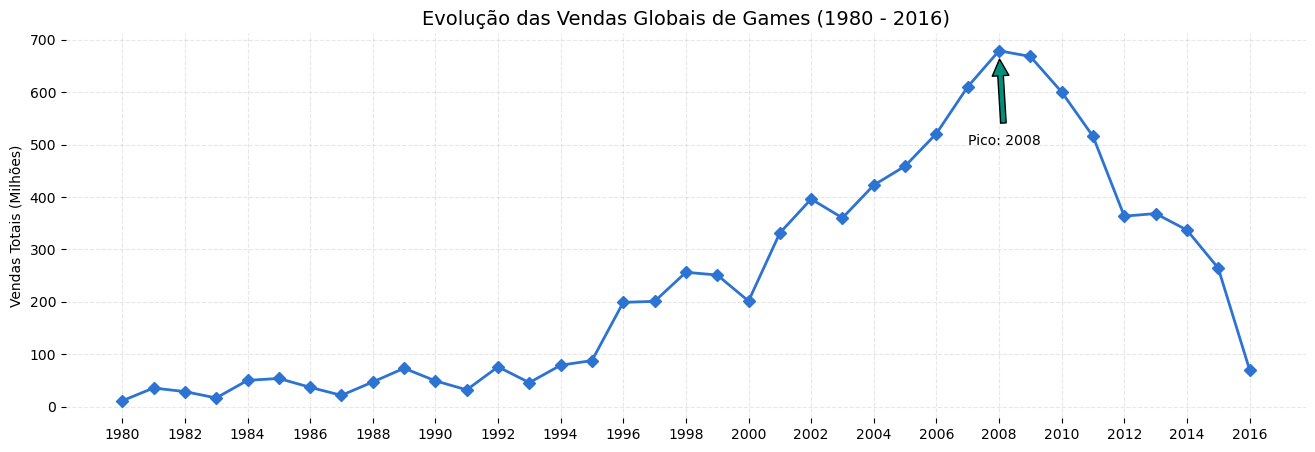

In [56]:
vendas_por_ano = df.groupby('Ano_lancamento')['Total_vendas'].sum()
# Agrupando vendas por ano
plt.figure(figsize=(16, 5))
plt.plot(vendas_por_ano.index, vendas_por_ano.values, marker='D', color='#2c73d2', linewidth=2)
plt.title('Evolução das Vendas Globais de Games (1980 - 2016)', fontsize=14)
plt.ylabel('Vendas Totais (Milhões)')
plt.xlabel('')
plt.box(False)
plt.grid(True, linestyle='--', alpha=0.3)
# Usamos o np.arange para criar uma lista: Do primeiro ano ao último, de 2 em 2.
plt.xticks(np.arange(vendas_por_ano.index.min(), vendas_por_ano.index.max() + 2, 2))

ano_pico = vendas_por_ano.idxmax() # Destaque para o pico
vendas_pico = vendas_por_ano.max()
plt.annotate(f'Pico: {ano_pico}',
             xy=(ano_pico, vendas_pico),
             xytext=(ano_pico - 1, vendas_pico - 180),
             arrowprops=dict(facecolor='#008f7a', shrink=0.1))

plt.show()

### 📉 Leitura da Tendência
O gráfico narra a ascensão e transformação do mercado físico:

* **A Escalada (1995-2007):** Crescimento exponencial impulsionado pela popularização global dos videogames (Era Playstation 1 e 2).
* **O Pico Histórico (2008):** O mercado atingiu seu recorde de vendas físicas (aprox. 680 milhões de unidades) no auge da geração **Wii, PS3 e Xbox 360**.

* **A Queda (Pós-2011):** A curva descendente reflete dois fenômenos simultâneos:
    *  **Transição de Mercado:** A migração natural dos jogadores para lojas digitais (não contabilizadas neste dataset), reduzindo o volume de mídia física.
--------------

## 🏆 A Guerra dos Consoles (1980 - 2016)
Além de saber quem vendeu mais no total, é crucial entender **quando** cada plataforma dominou o mercado.
Este gráfico destaca apenas o **líder de vendas** de cada ano, ilustrando os ciclos de vida e a troca de reinado entre as gerações de videogames.

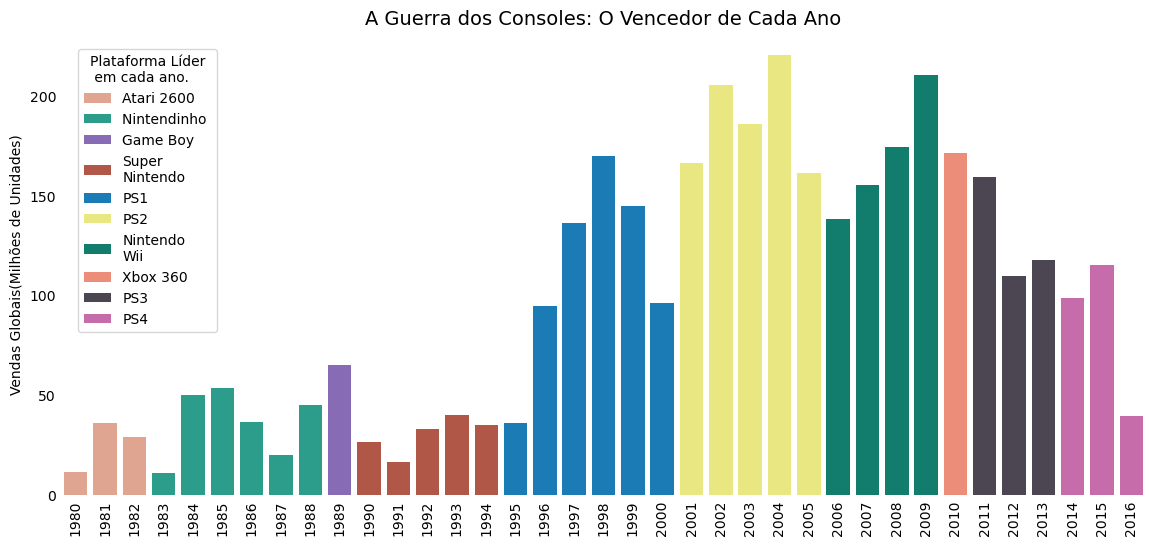

In [59]:
# Agrupar por Ano/Plataforma e pega o Maior
vendas_ano_plat = df.groupby(['Ano_lancamento', 'Plataforma'])['Total_vendas'].sum().reset_index()
idx_campeoes_plat = vendas_ano_plat.groupby('Ano_lancamento')['Total_vendas'].idxmax()
df_campeoes_plat = vendas_ano_plat.loc[idx_campeoes_plat]

# Criando o Gráfico
plt.figure(figsize=(14, 6))
ax = sns.barplot(x='Ano_lancamento', y='Total_vendas', hue='Plataforma', data=df_campeoes_plat, dodge=False, palette=pal_cores)
plt.title('A Guerra dos Consoles: O Vencedor de Cada Ano', fontsize=14)
plt.ylabel('Vendas Globais(Milhões de Unidades)')
plt.xlabel('')
plt.xticks(rotation=90)
plt.tick_params(axis='both', which='both', length=0)
plt.box(False)
plt.legend(title='Plataforma Líder\n em cada ano.', bbox_to_anchor=(0.15, 0.98))
plt.show()

### 👑 A Sucessão dos Tronos
O gráfico revela fases distintas da indústria através das cores:
* **Era Nintendo (Anos 80/90):** O domínio inicial do **NES** e a impressionante resistência do **Game Boy**.
* **Era PlayStation (1995-2005):** A entrada da Sony mudou o mercado, com o **PS1** e **PS2** liderando por uma década inteira.
* **O Fenômeno Wii (2006-2009):** O pico mais alto do gráfico pertence ao **Wii**, que expandiu o mercado para o público casual.
* **A Retomada:** Nos anos finais da amostra (2013-2016), vemos a Sony recuperando a liderança com o **PS3 e PS4**, superando a fase do Xbox 360.

-----------

## 📚 Variedade de Catálogo: Quem teve mais jogos?
Antes de falarmos em vendas totais, analisamos o **tamanho da biblioteca** de cada console.
Este gráfico mostra a **quantidade de títulos únicos** lançados para cada plataforma. Um catálogo extenso indica forte apoio das desenvolvedoras e longevidade no mercado.

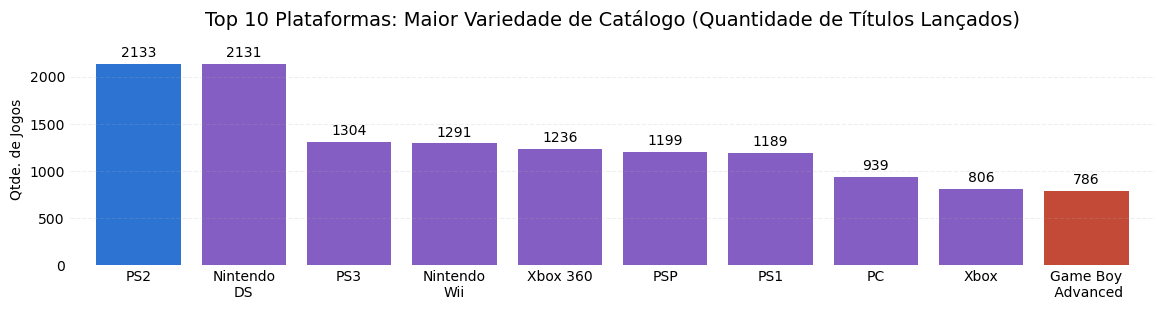

In [62]:
# Agrupando: Pegamos a Plataforma e contamos QUANTOS jogos existem nela
jogos_por_plataforma = df.groupby('Plataforma')['Total_vendas'].count().sort_values(ascending=False).head(10)
cores = get_cores_destaque(len(jogos_por_plataforma))
# 3. O Gráfico
plt.figure(figsize=(14, 3))
ax = jogos_por_plataforma.plot(kind='bar', color=cores, width=0.8)
plt.title('Top 10 Plataformas: Maior Variedade de Catálogo (Quantidade de Títulos Lançados)', fontsize=14)
plt.ylabel('Qtde. de Jogos')
plt.xlabel('')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.2)
plt.tick_params(axis='both', which='both', length=0)
plt.box(False)
ax.bar_label(ax.containers[0], fmt='%.0f', padding=3, fontsize=10)
plt.ylim(0, jogos_por_plataforma.max() * 1.15)

plt.show()

### 📊 O Fenômeno Nintendo DS e PS2
Ao analisarmos a quantidade de lançamentos, vemos uma disputa acirrada no topo:
* **Liderança Técnica (Nintendo DS):** O portátil da Nintendo aparece tecnicamente empatado com o PS2 em número de jogos lançados (ambos na casa dos 2.100 títulos). Isso reflete a facilidade e o baixo custo de desenvolvimento para o portátil, que atraiu milhares de estúdios menores.
* **A Consistência do PlayStation:** Note como a Sony domina o Top 3 com **PS2** e **PS3**, mostrando que suas plataformas foram o "padrão da indústria" para desenvolvedores por duas gerações seguidas.
* **Wii vs. Xbox 360:** Ambos possuem bibliotecas robustas (~1.300 jogos), mas ficam visivelmente abaixo dos líderes, indicando um filtro de qualidade ou de licenciamento um pouco mais restrito (ou menor tempo de vida útil no caso do Wii).

------

## 💰 Top 10 Plataformas: Volume Global de Vendas (Software)
Nesta análise, mudamos o foco da "quantidade de jogos lançados" para o **volume total de cópias vendidas**.
Esta é a métrica definitiva de sucesso comercial de um ecossistema. O gráfico soma todas as vendas de todos os jogos da plataforma, permitindo identificar quais consoles geraram maior movimentação de mercado (acumulada em milhões e bilhões de unidades).

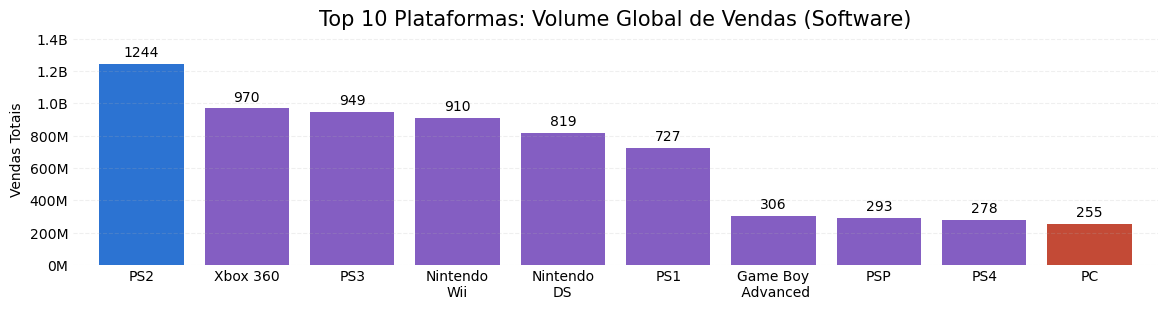

In [65]:
# Queremos somar as vendas (volume), não contar quantos jogos existem.
vendas_por_plataforma = df.groupby('Plataforma')['Total_vendas'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(14, 3))
ax = vendas_por_plataforma.plot(kind='bar', color=cores, width=0.8)

plt.title('Top 10 Plataformas: Volume Global de Vendas (Software)', fontsize=15)
plt.ylabel('Vendas Totais')
plt.xlabel('')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.2)
plt.tick_params(axis='both', which='both', length=0)
plt.box(False)

# A Mágica do Bilhão 💰
def formata_milhoes_bilhoes(x, pos):
    if x >= 1000:
        return f'{x/1000:.1f}B' # Ex: 1.2B
    return f'{x:.0f}M'      # Ex: 500M

ax.yaxis.set_major_formatter(FuncFormatter(formata_milhoes_bilhoes))
# fmt='%.0f' vai mostrar "1244" (milhões), que o leitor entende como 1.2B olhando o eixo
ax.bar_label(ax.containers[0], fmt='%.0f', padding=3, fontsize=10, color='black')
plt.ylim(0, vendas_por_plataforma.max() * 1.15)
plt.show()

### 📊 Insights de Mercado: O Clube do Bilhão
Ao mudar a métrica para volume de vendas, o cenário se transforma:

* **O Rei Solitário (PS2):** O **PlayStation 2** se isola ainda mais na liderança, sendo a única plataforma a romper com folga a barreira de **1.2 Bilhão (1.2B)** de jogos vendidos. Isso prova que ele não tinha apenas "muitos jogos", mas sim "muitos sucessos".
* **A Ascensão da Era HD (X360 e PS3):** Note como o **Xbox 360** e o **PS3** sobem no ranking. Embora tenham menos jogos lançados que o Nintendo DS, seus títulos (como *GTA V, Call of Duty*) venderam volumes massivos, colocando ambos próximos da marca de **1 Bilhão**.
* **O Caso Nintendo DS:** O portátil, que era vice-líder em "quantidade de lançamentos", cai para a 5ª posição em volume de vendas. Isso indica um mercado mais pulverizado: muitos jogos lançados, mas com uma média de vendas por título menor que a dos consoles de mesa.

-------

## 🏢 Dominância de Mercado: As Publicadoras (Publishers)
Enquanto a guerra dos consoles define "onde" jogamos, a batalha das publicadoras define "o que" jogamos.
Este gráfico ilustra qual empresa vendeu o maior volume de softwares (jogos) em cada ano, revelando a força das marcas e franquias ao longo do tempo.

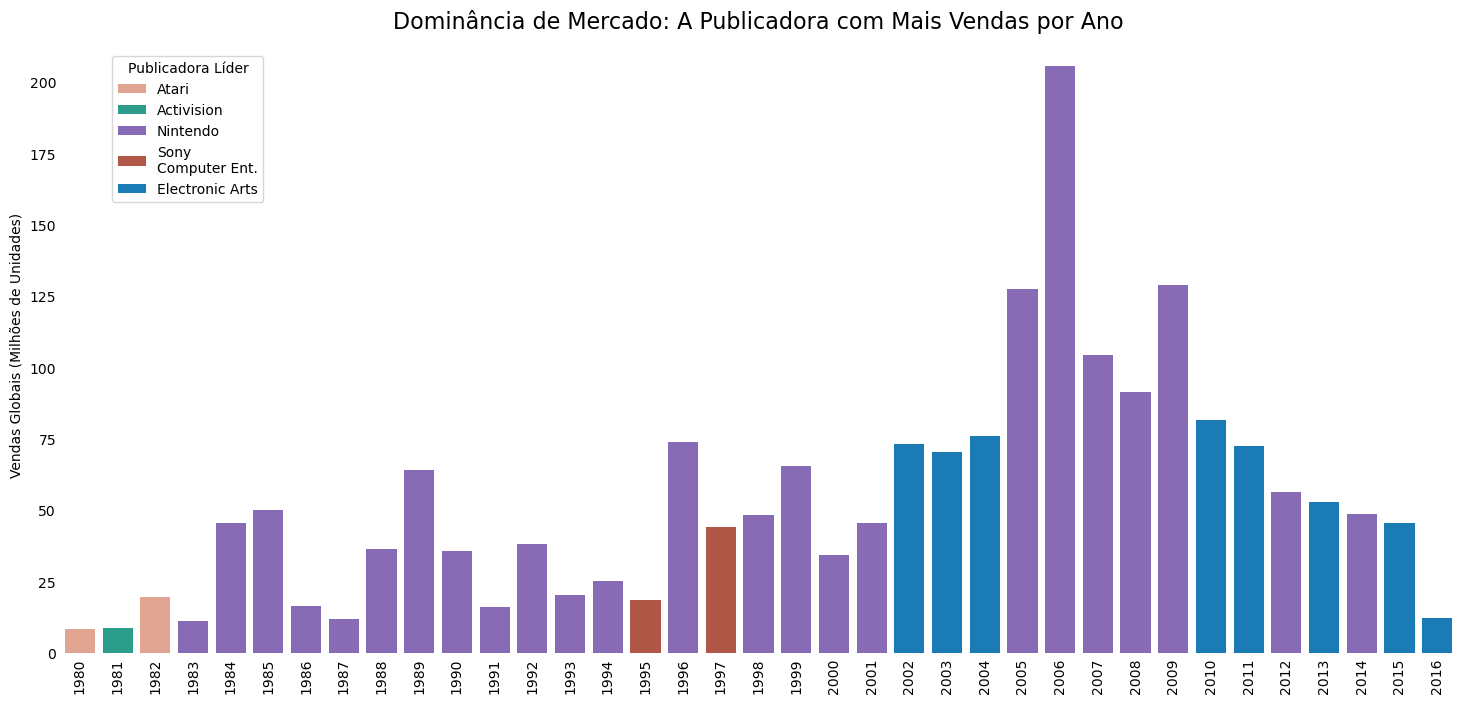

In [68]:
# 1. Preparando os dados (Agrupa por Ano/Publicadora e pega a Maior)
vendas_ano_pub = df.groupby(['Ano_lancamento', 'Publicadora'])['Total_vendas'].sum().reset_index()
idx_campeoes_pub = vendas_ano_pub.groupby('Ano_lancamento')['Total_vendas'].idxmax()
df_campeoes_pub = vendas_ano_pub.loc[idx_campeoes_pub]

# 2. Criando o Gráfico
plt.figure(figsize=(18, 8))
ax = sns.barplot(x='Ano_lancamento', y='Total_vendas', hue='Publicadora', 
                 data=df_campeoes_pub, dodge=False, palette=pal_cores)

plt.title('Dominância de Mercado: A Publicadora com Mais Vendas por Ano', fontsize=16)
plt.ylabel('Vendas Globais (Milhões de Unidades)')
plt.xlabel('')
plt.xticks(rotation=90)
plt.tick_params(axis='both', which='both', length=0)
plt.box(False)
plt.legend(title='Publicadora Líder', bbox_to_anchor=(0.15, 0.98))

plt.show()

### 📊 Duelo de Gigantes: Nintendo vs. EA
Ao analisar as cores, observamos uma disputa clara por território entre o entretenimento familiar e os blockbusters anuais:

* **O Império Nintendo (Roxo):** A Nintendo não apenas fabrica consoles, mas domina a venda de jogos. Observe a hegemonia absoluta nos anos 80/90 (Era Mario/Zelda) e o retorno avassalador entre 2006-2009 (Era Wii Sports/Mario Kart).
* **A Ascensão da Electronic Arts (Azul):** A partir dos anos 2000, a EA surge como a grande rival, sustentada por franquias anuais de esporte (*FIFA, Madden*) e sucessos como *Need for Speed* e *The Sims*. Note como ela domina vários anos da era moderna.
* **Os Pioneiros:** No início da série (1980-1982), vemos breves lideranças da **Atari** e **Activision**, lembrando a era pré-crash dos videogames.

--------

## 🏭 Volume de Produção: As Maiores Bibliotecas de Jogos
Antes de analisarmos o sucesso comercial (vendas), é fundamental entender o **tamanho do catálogo** de cada publicadora.
Este gráfico exibe o **número total de títulos lançados** historicamente pelas 10 maiores empresas do setor. Uma alta quantidade de lançamentos indica uma estratégia focada em diversificação e presença constante no mercado.

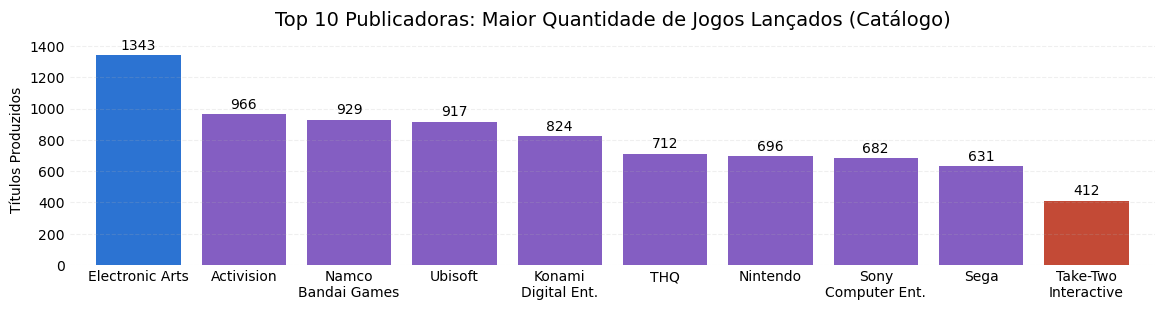

In [71]:
# Agrupando os dados
vendas_por_genero = df.groupby('Publicadora')['Total_vendas'].count().sort_values(ascending=False).head(10)
cores = get_cores_destaque(len(vendas_por_genero))
plt.figure(figsize=(14, 3))
ax = vendas_por_genero.plot(kind='bar', color=cores, width=0.8)
plt.title('Top 10 Publicadoras: Maior Quantidade de Jogos Lançados (Catálogo)', fontsize=14)
plt.ylabel('Títulos Produzidos')
plt.xlabel('')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.2)
plt.tick_params(axis='both', which='both', length=0)
plt.box(False)

ax.bar_label(ax.containers[0], fmt='%.0f', padding=2, fontsize=10)
plt.ylim(0, vendas_por_genero.max() * 1.1)
plt.show()

### 📊 Estratégia de Mercado: Quantidade vs. Foco
Ao observar o volume de produção, notamos padrões estratégicos distintos:

* **A Máquina de Conteúdo (Electronic Arts):** A EA lidera isolada com mais de **1.300 títulos lançados**. Isso reflete sua estratégia de lançamentos anuais recorrentes (*FIFA, Madden*) e aquisição de diversos estúdios ao longo das décadas.
* **O Domínio Ocidental:** O Top 5 é majoritariamente composto por gigantes ocidentais (**Activision, Ubisoft**), que apostam em portfólios vastos para cobrir múltiplos gêneros e nichos simultaneamente.
* **A Eficiência Japonesa:** Empresas como **Nintendo, Konami e Sony** aparecem no ranking, mas com volumes menores de lançamentos. Como veremos no próximo gráfico, elas compensam a "menor quantidade" com uma altíssima média de vendas por título (qualidade e exclusividade).


--------

## 💰 O Verdadeiro Poder: Volume de Vendas Globais (Publicadoras)
Agora, mudamos a perspectiva da "quantidade de lançamentos" para o **volume total de cópias vendidas**.
Este gráfico revela quais empresas realmente dominam a fatia de mercado. Uma publicadora pode lançar poucos jogos, mas se eles forem sucessos globais (blockbusters), ela subirá neste ranking, superando empresas que apostam apenas em volume.

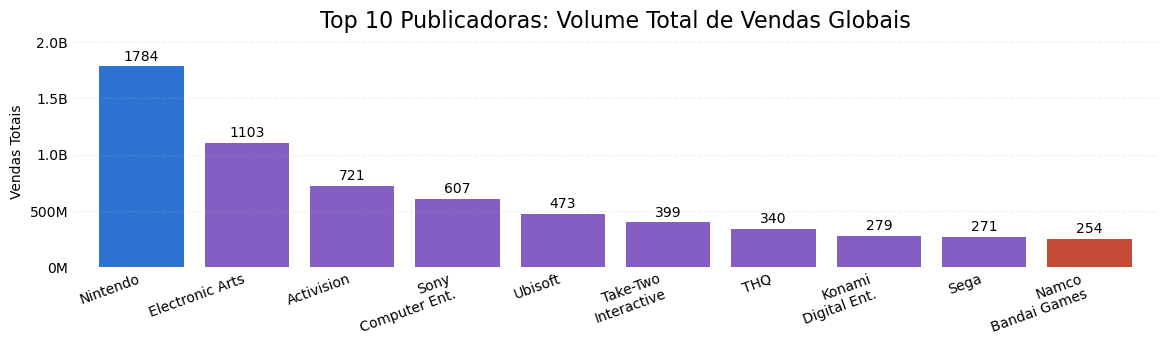

In [74]:
# Para somar as vendas globais
publicadoras_vendas = df.groupby('Publicadora')['Total_vendas'].sum().sort_values(ascending=False).head(10)
cores = get_cores_destaque(len(publicadoras_vendas))

plt.figure(figsize=(14, 3))
ax = publicadoras_vendas.plot(kind='bar', color=cores, width=0.8)
plt.title('Top 10 Publicadoras: Volume Total de Vendas Globais', fontsize=16)
plt.ylabel('Vendas Totais')
plt.xlabel('')
plt.xticks(rotation=20, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.2)
plt.tick_params(axis='both', which='both', length=0)
plt.box(False)

# Formatação de Bilhões/Milhões no Eixo Y
def formata_milhoes_bilhoes(x, pos):
    if x >= 1000:
        return f'{x/1000:.1f}B'
    return f'{x:.0f}M'

ax.yaxis.set_major_formatter(FuncFormatter(formata_milhoes_bilhoes))
ax.bar_label(ax.containers[0], fmt='%.0f', padding=2, fontsize=10)
plt.ylim(0, publicadoras_vendas.max() * 1.15)
plt.show()

### 📊 Qualidade vs. Quantidade: A Hegemonia da Nintendo
Ao compararmos este gráfico de vendas com o anterior (de catálogo), a mudança de liderança é evidente e revela estratégias opostas:

* **O Salto da Nintendo:** Embora a **Nintendo** estivesse em 7º lugar em "número de jogos lançados", ela assume a **liderança absoluta em vendas**, com quase 1.8 Bilhão de cópias. Isso comprova uma eficiência absurda: seus jogos (Mario, Pokémon, Zelda) possuem uma "taxa de venda por título" muito superior à média da indústria.
* **A Consistência da EA e Activision:** As gigantes ocidentais (**Electronic Arts** e **Activision**) mantêm posições de topo (2º e 3º), mostrando que sua estratégia de "lançamentos anuais em massa" (como *Call of Duty* e *FIFA*) também é extremamente lucrativa e gera volume massivo de vendas.
* **A Queda das Menores:** Empresas que apareciam no gráfico de quantidade apenas por lançarem muitos jogos pequenos somem ou caem neste ranking, pois não possuem *hits* globais suficientes para competir com os bilhões das líderes.
* **O Paradoxo da Namco Bandai:** Um caso emblemático dessa disparidade é a Namco Bandai Games. Embora a empresa demonstre uma capacidade produtiva impressionante, ocupando a 3ª posição em quantidade de títulos lançados (focada em nichos como animes e arcade), essa estratégia não se traduz na mesma proporção em vendas globais. Ao mudarmos a métrica para o volume de cópias vendidas, a empresa cai drasticamente para o 10º lugar, evidenciando que seu vasto catálogo é composto majoritariamente por jogos de nicho com vendas moderadas, diferentemente das líderes que apostam em poucos blockbusters de alcance mundial.

------

## 🏭 Oferta de Mercado: Onde as Desenvolvedoras Investem?

Antes de falarmos de vendas, olhamos para a **produção**. Este gráfico mostra a **quantidade de títulos lançados** por gênero.
Ele revela quais categorias receberam mais investimento e atenção dos estúdios ao longo da história, indicando quais mercados estão mais "cheios" de opções para o consumidor.

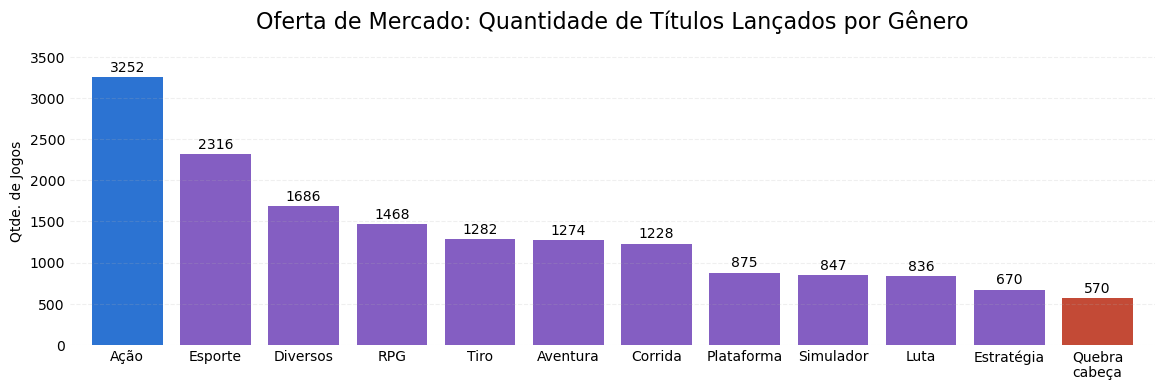

In [77]:
# Agrupando os dados por CONTAGEM (.count)
vendas_por_genero = df.groupby('Genero')['Total_vendas'].count().sort_values(ascending=False)
cores = get_cores_destaque(len(vendas_por_genero))

plt.figure(figsize=(14, 4))
ax = vendas_por_genero.plot(kind='bar', color=cores, width=0.8)

plt.title('Oferta de Mercado: Quantidade de Títulos Lançados por Gênero', fontsize=16)
plt.ylabel('Qtde. de Jogos') # Eixo Y simples
plt.xlabel('')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.2)
plt.tick_params(axis='both', which='both', length=0)
plt.box(False)

ax.bar_label(ax.containers[0], fmt='%.0f', padding=2, fontsize=10)
plt.ylim(0, vendas_por_genero.max() * 1.15)

plt.show()

### 📊 O Oceano de Opções em "Ação"
Ao analisar o catálogo, vemos claramente onde a concorrência é maior:
* **Saturação em Ação:** O gênero lidera isoladamente em número de lançamentos. Isso significa que, para se destacar aqui, um jogo precisa competir contra milhares de outros títulos.
* **A Grande Aposta em "Diversos" e "Aventura":** Note que esses gêneros possuem muitas barras altas. Isso indica que muitos jogos "menores" ou experimentais são feitos nessas categorias. Mas será que eles vendem bem? Vamos ver no próximo gráfico.


---------

### 💰 Demanda Global: O Que Realmente Vende?
Agora cruzamos a "Quantidade de Jogos" com o **Volume Total de Vendas**.
Este gráfico separa os nichos dos *blockbusters*. Se um gênero tinha uma barra enorme no gráfico anterior (muitos jogos lançados) mas aparece pequeno aqui, significa que ele tem "muitos jogos que vendem pouco". Se a barra se mantém grande, é um sinal de alta demanda massiva.?"

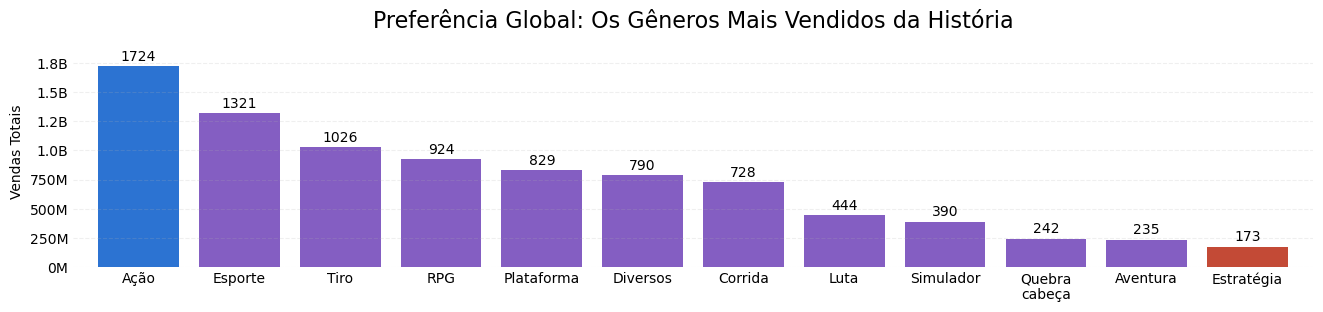

In [80]:
vendas_por_genero = df.groupby('Genero')['Total_vendas'].sum().sort_values(ascending=False)
cores = get_cores_destaque(len(vendas_por_genero))

plt.figure(figsize=(16, 3))
ax = vendas_por_genero.plot(kind='bar', color=cores, width=0.8)
plt.title('Preferência Global: Os Gêneros Mais Vendidos da História', fontsize=16)
plt.ylabel('Vendas Totais')
plt.xlabel('')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.2)
plt.tick_params(axis='both', which='both', length=0)
plt.box(False)

# 4. Formatação Inteligente (M/B)
def formata_milhoes_bilhoes(x, pos):
    if x >= 1000:
        return f'{x/1000:.1f}B' # Ex: 1.7B
    return f'{x:.0f}M'      # Ex: 500M

ax.yaxis.set_major_formatter(FuncFormatter(formata_milhoes_bilhoes))
ax.bar_label(ax.containers[0], fmt='%.0f', padding=2, fontsize=10)
plt.ylim(0, vendas_por_genero.max() * 1.15)
plt.show()

### 🧠 Insights de Eficiência: Ação vs. Aventura
Comparando os dois gráficos, a realidade do mercado se revela:
* **A Força Real da Ação:** O gênero **Ação** mantém a liderança, provando que a alta produção (gráfico de cima) é justificada por uma demanda insaciável (mais de 1.7 Bilhão de cópias vendidas).
* **A Queda da "Aventura":** Lembra que *Adventure* tinha muitos jogos lançados? Aqui ele cai drasticamente no ranking de vendas. **Conclusão:** É um gênero de muitos títulos de nicho, mas poucos sucessos comerciais globais.
* **A Eficiência do "Tiro" (Shooter):** O gênero *Shooter* sobe posições aqui em relação ao catálogo. Isso indica alta eficiência: lançam-se menos jogos de tiro do que de aventura, mas os que são lançados (como *Call of Duty*) vendem volumes absurdos.


-------

---------------------
## 🌡️ Mapa de Calor: Especialização de Mercado
**Análise Bi-variada: Gênero vs. Plataforma**

Nesta etapa, avançamos de análises isoladas para o cruzamento de variáveis. O objetivo deste mapa de calor é identificar padrões de comportamento e **nichos de mercado**:
* *Será que o público da Nintendo consome os mesmos gêneros que o público do PlayStation?*
* *Onde estão as maiores concentrações de vendas?*

> **Nota Metodológica:** Para garantir a legibilidade do gráfico e a relevância estatística, limitamos o eixo horizontal às **Top 10 Plataformas** com maior volume histórico de vendas.

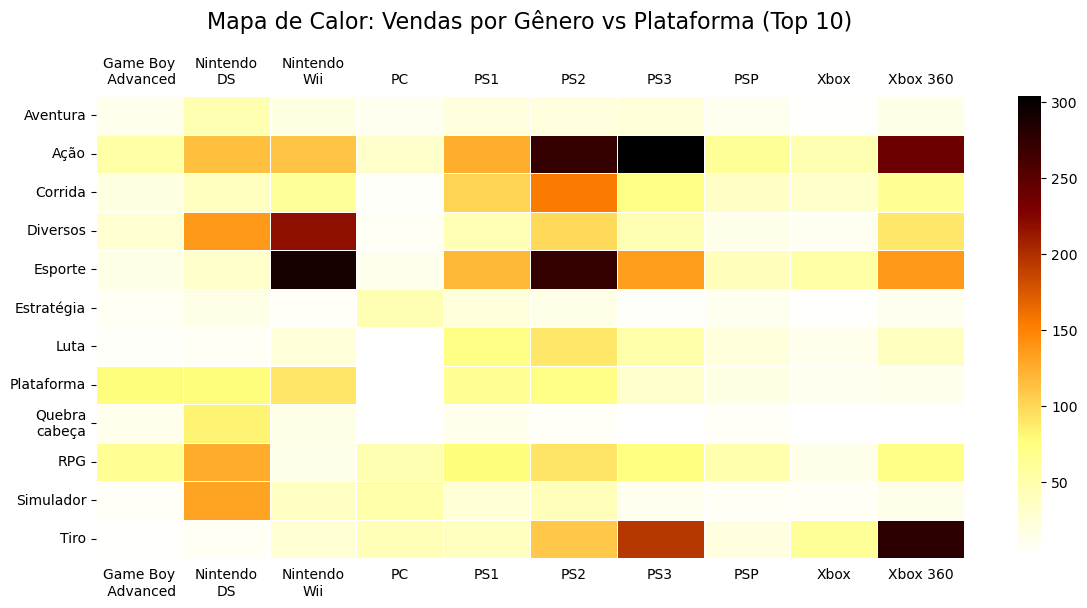

In [83]:
# Pegamos apenas as Top 10 plataformas
top_10_plataformas = df['Plataforma'].value_counts().head(10).index
# Filtramos o DF original
df_top_10 = df[df['Plataforma'].isin(top_10_plataformas)]

# Pivot Table
pivot_table = df_top_10.pivot_table(index='Genero', columns='Plataforma', values='Total_vendas', aggfunc='sum')
# Gráfico
plt.figure(figsize=(14, 6)) 
ax = sns.heatmap(pivot_table, cmap='afmhot_r', annot=False, linewidths=.5)
plt.ylabel('')
plt.xlabel('')
ax.tick_params(top=False, bottom=False , labeltop=True) # labeltop=True (mostra os nomes em cima) # top=True (mostra os tracinhos em cima) 
plt.title('Mapa de Calor: Vendas por Gênero vs Plataforma (Top 10)', fontsize=16, pad=20)
plt.show()

### 🗺️ Raio-X do Mercado: Análise de Calor (Gênero x Plataforma)

Este Mapa de Calor nos conta a história da indústria através do volume de cópias vendidas (em milhões de unidades). Ao cruzar os dados, observamos claramente onde o grande público investiu seu dinheiro nas últimas décadas.

#### 1. Os Gigantes do Hardware (O "Cinturão de Fogo") 🔥
Existe uma concentração massiva de vendas nas plataformas **PlayStation (PS1, PS2, PS3)** e **Xbox 360**. Note como as colunas desses consoles são consistentemente mais escuras em múltiplos gêneros.
* **A Guerra de Ação:** PS2, PS3 e Xbox 360 disputam ferozmente o gênero **Ação**, criando as zonas mais quentes do mapa. Isso reflete a era de ouro cinematográfica (como *GTA, God of War, Assassin's Creed*).
* **O Fenômeno Casual do Wii:** A coluna do **Nintendo Wii** é um caso à parte. Enquanto ignora quase totalmente gêneros como "Tiro" ou "RPG", ela brilha intensamente em **Esportes** e **Diversos**. Isso visualiza perfeitamente a estratégia "Oceano Azul" da Nintendo: capturar o público não-gamer com *Wii Sports* e *Wii Play*.

#### 2. Gêneros de Nicho vs. Massa (As Zonas Frias) ❄️
O gráfico também revela quais gêneros, embora amados pelos fãs, possuem um volume de vendas total muito inferior aos líderes de mercado.
* **As Áreas Claras:** Gêneros como **Aventura, Estratégia, Luta, Plataforma, Quebra-Cabeça (Puzzle), RPG e Simulador** aparecem majoritariamente em tons claros.
* **A Interpretação:** Isso não significa que esses jogos "não vendem", mas sim que eles não movem massas globais da mesma forma que "Ação" e "Esportes".
    * *Exceção:* O gênero **Plataforma** tem um leve destaque nas colunas da Nintendo (GBA, DS, Wii), mostrando que Mario e seus amigos ainda sustentam esse estilo de jogo, enquanto ele praticamente desapareceu nos consoles concorrentes.
    * *O Caso de Estratégia:* Aparece quase invisível nos consoles, pois historicamente é um gênero dominado pelo PC (que, embora esteja no gráfico, tem vendas físicas menos rastreadas ou volumes menores comparados aos consoles de mesa).
 
#### 3. A Evolução do Shooter (Tiro): 🔫
* Perceba como o gênero Tiro (Shooter) é "frio" nos consoles mais antigos ou portáteis (PS1, GBA, DS), mas se torna extremamente "quente" e dominante na geração HD (**Xbox 360 e PS3**).
* Isso reflete a popularização dos FPSs online (como *Call of Duty*) nessa era.


-------------

## 📦 Análise de Dispersão (Boxplot): Risco e Retorno por Gênero

Para entender a estabilidade de vendas de cada gênero, utilizamos o **Diagrama de Caixa (Boxplot)**.

Como o mercado de games possui uma distribuição de **Cauda Longa** (muitos jogos vendendo pouco e pouquíssimos *hits* vendendo milhões), dividimos a visualização em duas partes:
1.  **Visão Global (Com Outliers):** Para evidenciar a existência dos *Super Hits* que distorcem a escala.
2.  **Visão Focada (Sem Outliers):** Um "zoom" na distribuição central (até 2 milhões de cópias) para analisarmos a Média (ponto branco) e a Mediana (linha interna) da maioria dos títulos.

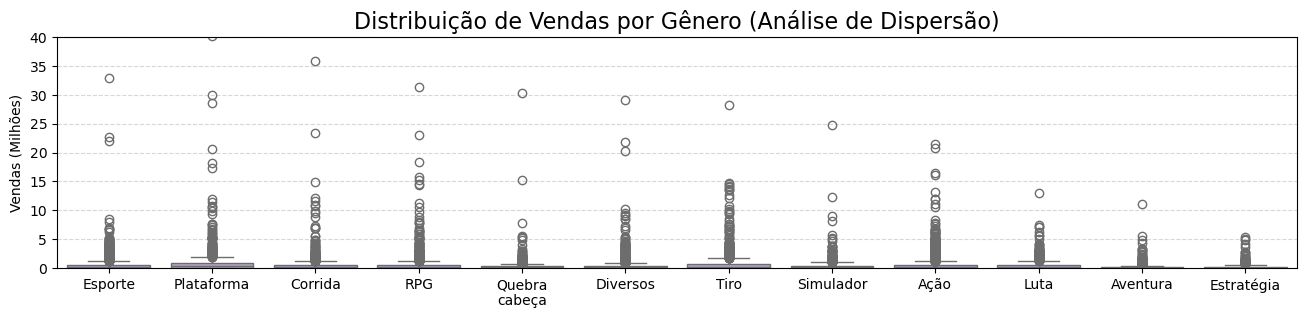

In [86]:
# Boxplot focado em Outliers:
plt.figure(figsize=(16, 3))
# Como temos jogos gigantes (Wii Sports com 80mi), o gráfico vai ficar "esmagado".
sns.boxplot(x='Genero', y='Total_vendas', data=df, color= '#b39cd0')
plt.title('Distribuição de Vendas por Gênero (Análise de Dispersão)', fontsize=16)
plt.ylabel('Vendas (Milhões)')
plt.xlabel('')
plt.ylim(0, 40) 
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

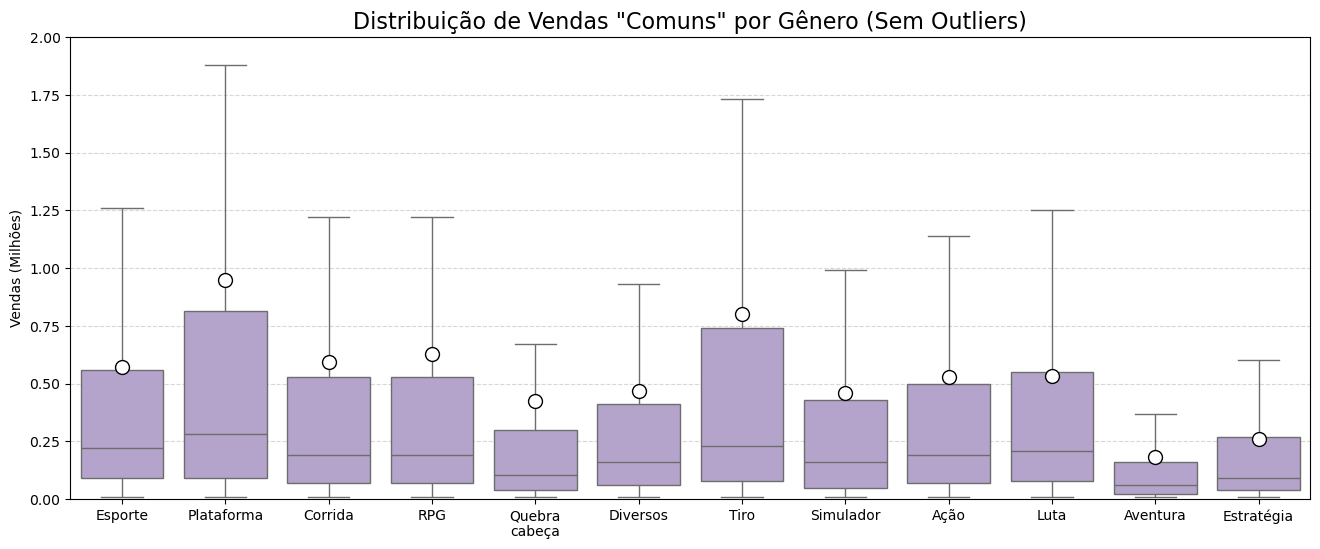

In [87]:
# Boxplot que esconde os Outliers para focar na distribuição principal:
plt.figure(figsize=(16, 6))
sns.boxplot(
    x = 'Genero', y = 'Total_vendas', data = df, color = '#b39cd0', showfliers = False, showmeans = True, meanprops = {
    "marker" : "o", 
    "markerfacecolor" : "white",                                   # showfliers= False: Esconde os Outliers
    "markeredgecolor" : "black", 
    "markersize" : "10"                              # showmeans=True: Adiciona um símbolo mostrando onde está a MÉDIA aritmética
    }
)
plt.title('Distribuição de Vendas "Comuns" por Gênero (Sem Outliers)', fontsize=16)
plt.ylabel('Vendas (Milhões)')
plt.xlabel('')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.ylim(0, 2) # Ajustando o zoom para onde a "massa" dos dados está (0 a 2 milhões de cópias)
plt.show()

### 🔎 Insights Estatísticos da Distribuição

Ao eliminar o ruído dos *outliers* e focar na distribuição padrão (segundo gráfico), três padrões de mercado se tornam evidentes:

#### 1. A Assimetria do Mercado (Média > Mediana)
Observe o **Ponto Branco (Média)** em relação à **Linha Preta (Mediana)** dentro das caixas.
* Em **todos** os gêneros, a Média está posicionada **acima** da Mediana.
* **Conceito Estatístico:** Isso confirma uma **Assimetria à Direita (Positive Skewness)**. Significa que os jogos *Blockbusters* (aqueles pontos soltos do primeiro gráfico) puxam a média de faturamento para cima, criando uma falsa sensação de que "todo jogo vende bem". A realidade (mediana) é sempre mais modesta.

#### 2. O Porto Seguro: "Plataforma" e "Tiro"
* **Plataforma:** Possui a caixa mais alta e a maior mediana. Isso indica consistência. Mesmo um jogo "mediano" de plataforma tende a vender mais que a média dos outros gêneros.
* **Tiro (Shooter):** Possui uma caixa alongada e uma das maiores médias (ponto branco). Isso mostra alta variabilidade: é um gênero de "tudo ou nada".

#### 3. O Risco da "Aventura" e "Estratégia"
* Veja como as caixas de **Aventura** e **Estratégia** são "achatadas" e próximas de zero.
* Isso indica que são nichos onde é muito difícil performar comercialmente. A grande massa desses jogos vende menos de 100-200 mil cópias (mediana baixíssima), dependendo exclusivamente de *outliers* para movimentar a categoria.


----------

# 🌍 O Mapa Mundi dos Games: 4 Regiões
Para obtermos uma visão completa do mercado, segmentamos as vendas das 5 maiores plataformas em quatro grandes blocos geográficos: **América do Norte**, **Europa**, **Japão** e **Resto do Mundo**.

A inclusão da categoria **"Resto do Mundo"** é crucial, pois ela engloba mercados emergentes e revela onde consoles, como o PlayStation, alcançaram penetração extra para além dos territórios tradicionais. Essa análise nos permite visualizar onde cada plataforma realmente dominou e identificar preferências culturais distintas entre os continentes.

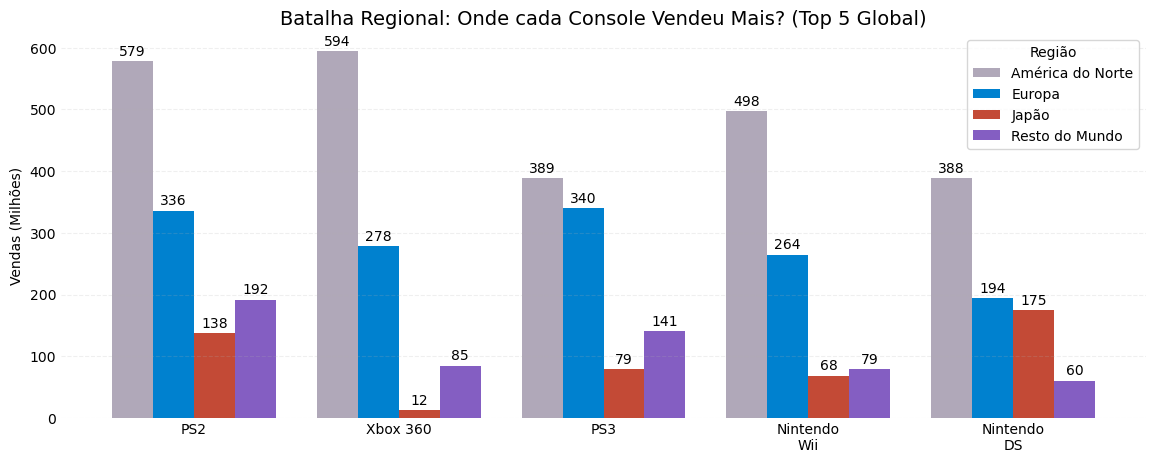

In [91]:
# Preparando os dados: Somamos as vendas por região para cada plataforma
analise_regional = df.groupby('Plataforma')[['Vendas_America_Norte', 'Vendas_Europa', 'Vendas_Japao', 'Vendas_outras_regioes']].sum()
analise_regional.columns = ['América do Norte', 'Europa', 'Japão', 'Resto do Mundo']
# Pegamos apenas o Top 5 Global para o gráfico não ficar poluido
top5_global = df.groupby('Plataforma')['Total_vendas'].sum().sort_values(ascending=False).head(5).index
analise_regional = analise_regional.loc[top5_global]

plt.figure(figsize=(14, 5)) 
ax = analise_regional.plot(kind='bar', width=0.8, color=['#b0a8b9', '#0081cf', '#c34a36', '#845ec2'], ax=plt.gca())

plt.title('Batalha Regional: Onde cada Console Vendeu Mais? (Top 5 Global)', fontsize=14)
plt.ylabel('Vendas (Milhões)')
plt.xlabel('')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.2)
plt.tick_params(axis='both', which='both', length=0)
plt.legend(title='Região')
plt.box(False)

for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', padding=2, fontsize=10)
plt.show()

### 📊 Análise Geopolítica: Onde Cada Console Realmente Domina?
Ao segmentarmos as vendas pelas quatro grandes regiões, os perfis estratégicos de cada plataforma se revelam claramente:

* **O "Console Americano" (Xbox 360):** A dependência geográfica da Microsoft é evidente. O Xbox 360 tem um desempenho massivo na *América do Norte* (barra cinza), mas sua presença despenca drasticamente no *Japão* e no *Resto do Mundo*. Isso mostra que, naquela geração, o console não conseguiu furar a bolha cultural fora do eixo anglófono.

* **O Gigante Cosmopolita (PlayStation):** A Sony demonstra a distribuição mais saudável e globalizada. Note como as baroxas elas (*Resto do Mundo*) são significativas para o **PS2** e **PS3**, indicando forte penetração em mercados emergentes (como Brasil e Oriente Médio). Essa capilaridade global, somada a um equilíbrio na *Europa* (barra azul), é o que garante a estabilidade da marca mesmo quando ela não lidera nos EUA.

* **A Muralha Japonesa (Nintendo & Sony):** O mercado japonês (barra vermelha) exibe um comportamento protecionista. O **Nintendo DS** e as plataformas **PlayStation** possuem fatias expressivas nesse mercado, enquanto concorrentes ocidentais são estatisticamente irrelevantes. O DS, inclusive, é um fenômeno cultural no Japão, com vendas locais competindo de igual para igual com seus números europeus. 


---------

### 🗺️ Gosto Cultural: O Gênero Favorito de Cada Região
Além de preferirem consoles diferentes, será que as regiões também jogam coisas diferentes?
Este gráfico cruza os **5 maiores gêneros** da indústria com as vendas por região. O objetivo é testar o estereótipo de que "o Ocidente prefere Ação e o Oriente prefere RPGs".

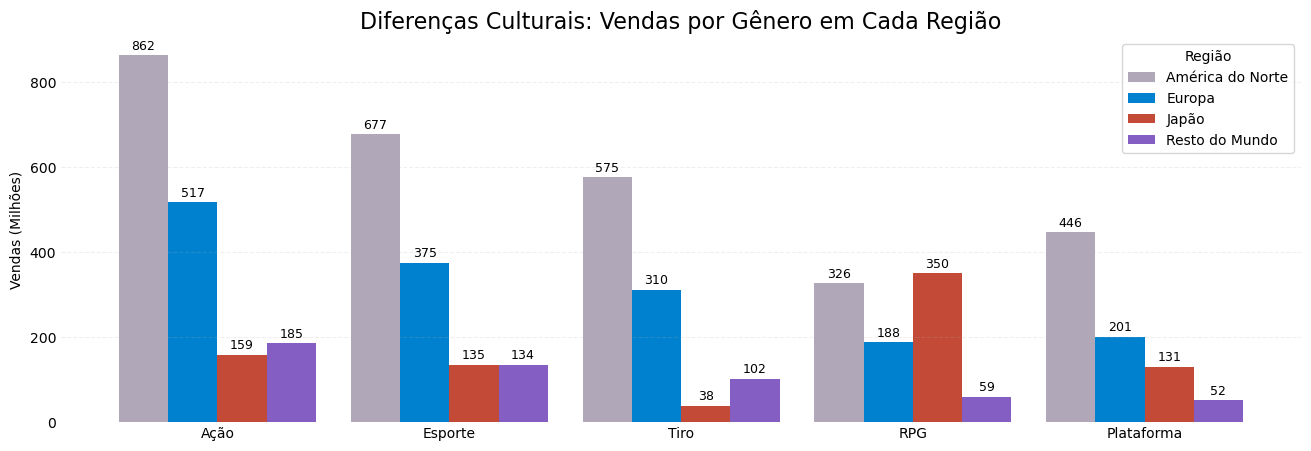

In [94]:
# 1. Agrupando Vendas por Gênero e Região
genero_regional = df.groupby('Genero')[['Vendas_America_Norte', 'Vendas_Europa', 'Vendas_Japao', 'Vendas_outras_regioes']].sum()
# Selecionando apenas os Top 5 Gêneros mais vendidos no total (para limpar o gráfico)
top5_generos = df.groupby('Genero')['Total_vendas'].sum().sort_values(ascending=False).head(5).index
genero_regional = genero_regional.loc[top5_generos]
genero_regional.columns = ['América do Norte', 'Europa', 'Japão', 'Resto do Mundo']
cores_regioes = ['#b0a8b9', '#0081cf', '#c34a36', '#845ec2']

# Plotando
plt.figure(figsize=(16, 5))
ax = genero_regional.plot(kind='bar', width=0.85, color=cores_regioes, ax=plt.gca())
plt.title('Diferenças Culturais: Vendas por Gênero em Cada Região', fontsize=16)
plt.ylabel('Vendas (Milhões)')
plt.xlabel('')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.2)
plt.tick_params(axis='both', which='both', length=0)
plt.legend(title='Região')
plt.box(False)

for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', padding=2, fontsize=9)

plt.show()

### 🎎 A Exceção Cultural: O Caso do RPG no Japão
Os dados confirmam uma profunda divisão cultural no consumo de jogos:

* **O Abismo do RPG:** Observe a barra vermelha (Japão) no gênero **Role-Playing (RPG)**. Ela é desproporcionalmente alta, sendo maiorque o tamanho da barra da América do Norte. Enquanto o Ocidente vê o RPG como um gênero importante, para o Japão ele é o **gênero dominante** (graças a franquias como *Pokémon, Final Fantasy e Dragon Quest*).
* **Ação e Tiro são Ocidentais:** Nos gêneros **Action** e **Shooter**, as barras cinzas (EUA) e azuis (Europa) dominam completamente, enquanto a barra vermelha (Japão) quase desaparece. Jogos de tiro em primeira pessoa (*Call of Duty*) têm dificuldade histórica de penetração no mercado asiático.r* **Esportes (A Ponte Transatlântica):** O gênero **Esportes** é um fenômeno curioso. Embora a América do Norte lidere em volume (impulsionada por Madden NFL, NBA), a Europa possui uma barra muito expressiva, quase colada na americana. Isso é o "Efeito Futebol": a paixão europeia pelo esporte garante que títulos como **FIFA** tenham vendas massivas, tornando este gênero um dos pilares de sustentação do mercado europeu.
* **Plataforma (O Gênero Universal):** Vale notar a presença constante do gênero Plataforma nos pódios. Ele é um dos poucos gêneros que consegue performar bem em todas as três grandes regiões. Isso se deve à força universal da marca **Super Mario**, que transcende barreiras linguísticas e culturais, sendo popular tanto em **Tóquio** quanto em **Nova York** ou **Londres**.ias.


----------

### 🗺️ Gosto Cultural e Poder de Compra: Uma Comparação Real
Neste gráfico, analisamos os **3 gêneros favoritos de cada região**, mas com um detalhe crucial: mantivemos a **mesma escala de vendas** (eixo Y) para todos.
Isso nos permite comparar não apenas *o que* se joga, mas também o **tamanho real de cada mercado**. As barras mais altas indicam onde o dinheiro da indústria realmente circula.

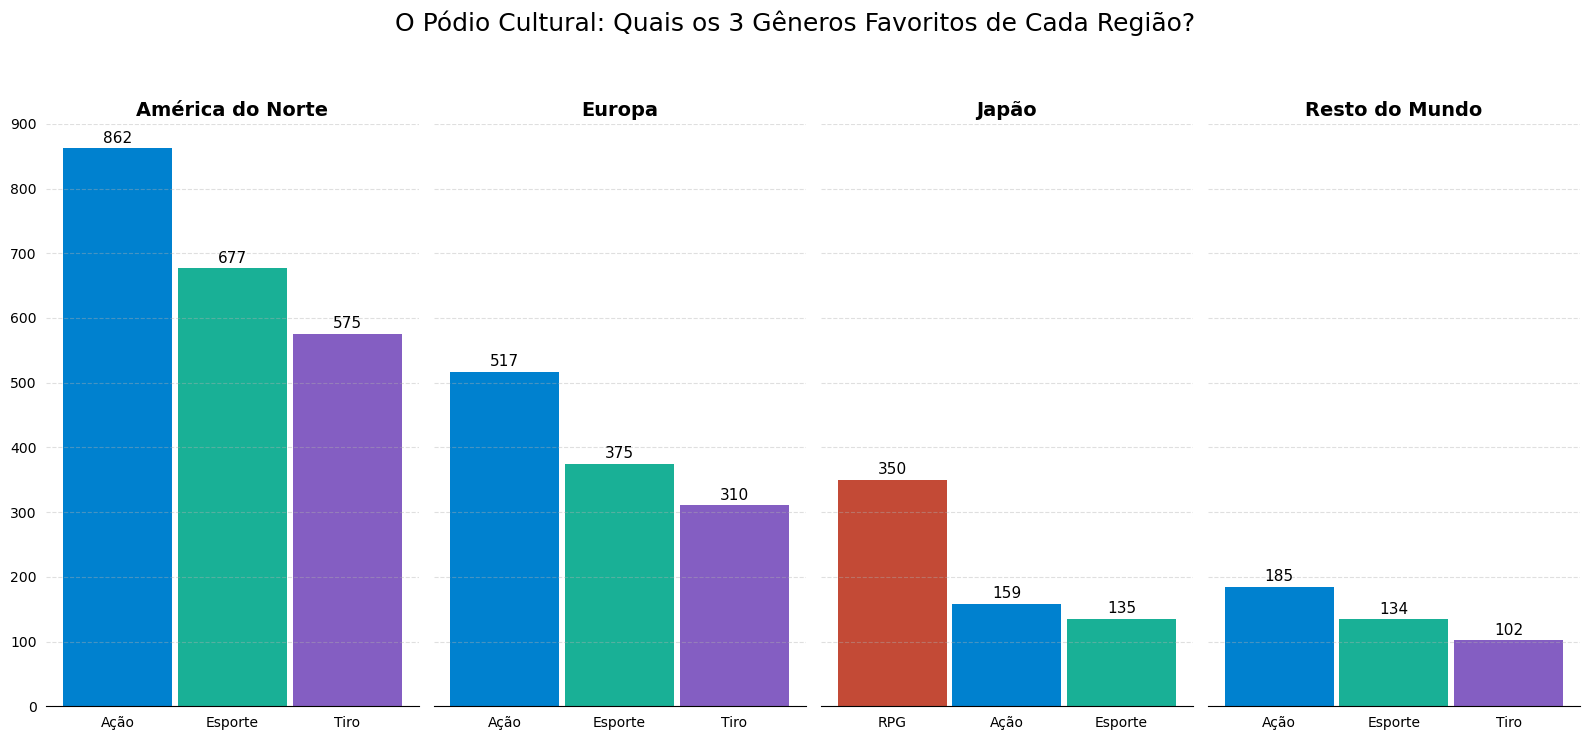

In [97]:
# 1. Configuração de Cores Fixas para os Gêneros (Para manter consistência visual)
mapa_cores = {
    'Ação': '#0081cf',       # Azul
    'Esporte': '#19B096',    # Verde
    'Tiro': '#845EC2',       # Roxo
    'RPG': '#c34a36',        # Vermelho
    'Plataforma': '#ffc75f', # Amarelo
    'Diversos': '#4b4453',   # Cinza Escuro
    'Corrida': '#d65db1',    # Rosa
    'Simulador': '#ff8066'   # Laranja
}
# 2. Preparando os dados (Agrupamento por Gênero)
analise_genero = df.groupby('Genero')[['Vendas_America_Norte', 'Vendas_Europa', 'Vendas_Japao', 'Vendas_outras_regioes']].sum()
# Lista de regiões
regioes = [
    ('Vendas_America_Norte', 'América do Norte'),
    ('Vendas_Europa', 'Europa'),
    ('Vendas_Japao', 'Japão'),
    ('Vendas_outras_regioes', 'Resto do Mundo')
]
# 3. Criando os 4 Subplots (1 linha, 4 colunas)
fig, axes = plt.subplots(1, 4, figsize=(16, 7), sharey=True)

for i, (coluna_dados, nome_titulo) in enumerate(regioes): # criar cada gráfico
    ax = axes[i]
# Pega os Top 3 gêneros dessa região específica
    top3 = analise_genero[coluna_dados].sort_values(ascending=False).head(3)
    cores = [mapa_cores.get(g, '#999999') for g in top3.index] 

    # Plotar
    bars = ax.bar(top3.index, top3.values, color=cores, width=0.95)
    ax.set_ylim(0, 900)
    ax.set_title(nome_titulo, fontsize=14, fontweight='bold')
    ax.grid(axis='y', linestyle='--', alpha=0.4)
    ax.tick_params(left=False, bottom=False)
    ax.bar_label(bars, fmt='%.0f', padding=2, fontsize=11)
    
    # Remover bordas
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    
plt.suptitle('O Pódio Cultural: Quais os 3 Gêneros Favoritos de Cada Região?', fontsize=18, y=1.05)
plt.tight_layout()
plt.show()

### 💰 A Hegemonia Americana e a Exceção Japonesa
Ao compararmos os mercados com a mesma régua, três conclusões financeiras emergem:

* **O Gigante Americano:** A barra de **Ação** na *América do Norte* é colossal, quase tocando o topo da escala. Isso visualiza claramente que o mercado americano sozinho movimenta mais unidades do que as outras regiões somadas em muitos gêneros. É o motor econômico da indústria.
* **O Nicho Poderoso do Japão:** O Japão (terceiro gráfico) mostra um padrão único. Enquanto suas barras de Ação e Esportes são tímidas, a barra de **RPG (Role-Playing)** se destaca enormemente. Porém, na escala global, mesmo esse gênero dominante no Japão é menor em volume absoluto do que os hits de ação do Ocidente.
* **A Europa como "Espelho":** O mercado europeu reflete as preferências americanas (Ação e Esportes no topo), mas com um volume de vendas ligeiramente menor. Note a força de **Esportes** na Europa (impulsionada pelo futebol), que proporcionalmente é muito relevante.

--------

### 🏆 Hall da Fama: Os 10 Jogos Mais Vendidos da História
Ao somarmos as vendas de todas as plataformas para cada título, chegamos ao ranking definitivo de popularidade.
Este gráfico exibe a elite da indústria: jogos que furaram a bolha e se tornaram fenômenos culturais globais. Note que agrupamos vendas de diferentes consoles (ex: vendas de *GTA V* no PS3, PS4, Xbox, etc. foram somadas) para representar o alcance real da obra.

In [100]:
# 1. Agrupar por Nome do Jogo para somar as vendas de todas as plataformas
df_jogos_unicos = df.groupby('Jogo').agg({
    'Total_vendas': 'sum',
    'Publicadora': 'first' # Mantém o nome da publicadora
}).reset_index()

# Ordenar o ranking geral do maior para o menor
ranking_geral = df_jogos_unicos.sort_values('Total_vendas', ascending=False)

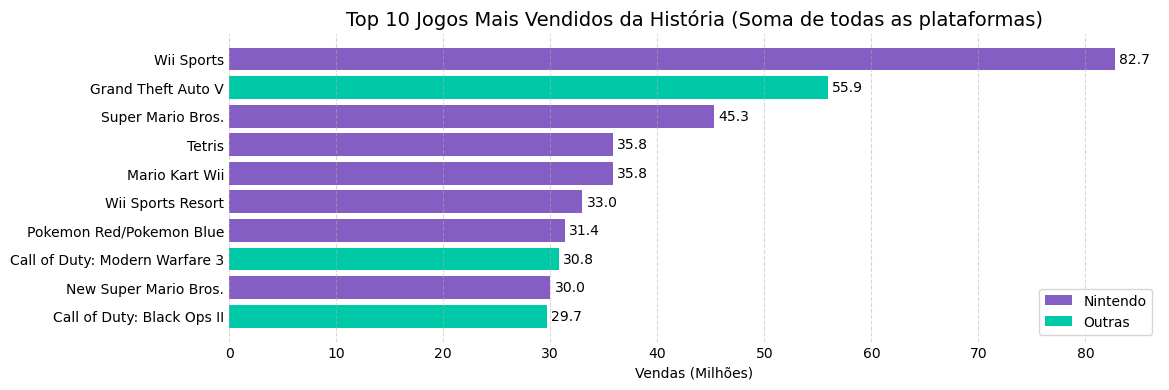

In [101]:
# Pegamos os top 10 do ranking já agrupado
top_10 = ranking_geral.head(10).sort_values('Total_vendas', ascending=True)
cores_jogos = ['#845EC2' if pub == 'Nintendo' else '#00c9a7' for pub in top_10['Publicadora']]

plt.figure(figsize=(12, 4))
barras = plt.barh(top_10['Jogo'], top_10['Total_vendas'], color=cores_jogos)

plt.title('Top 10 Jogos Mais Vendidos da História (Soma de todas as plataformas)', fontsize=14)
plt.xlabel('Vendas (Milhões)')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tick_params(axis='both', which='both', length=0)
plt.box(False)
plt.bar_label(barras, fmt='%.1f', padding=3, fontsize=10)

legend_elements = [Patch(facecolor='#845EC2', label='Nintendo'), Patch(facecolor='#00c9a7', label='Outras')]
plt.legend(handles=legend_elements, loc='lower right')

plt.show()

### 🍄 A Hegemonia Nintendo e o Fenômeno GTA
Mesmo unificando as plataformas, o domínio da Nintendo é impressionante, mas novos desafiantes aparecem:

* **O Efeito Wii Sports:** O líder absoluto continua sendo **Wii Sports**, impulsionado por ter sido vendido junto com o console Wii na maior parte do mundo. Ele levou os games para um público que nunca havia tocado em um controle antes.
* **A Força do Multiplataforma (GTA V):** Graças ao agrupamento de dados, vemos a verdadeira magnitude de **Grand Theft Auto V**. Ele é o único título "Hardcore/Ação" moderno capaz de brigar no topo com os clássicos da Nintendo, provando ser um dos produtos de entretenimento mais lucrativos da história.
* **Clássicos Eternos:** O Top 10 é preenchido por *evergreens* como **Tetris** e **Minecraft**, jogos que transcendem gerações e continuam vendendo consistentemente por décadas.

------

### 🌍 O Ranking Expandido (11º ao 30º): Onde as "Third-Parties" Brilham
Enquanto o Top 10 é dominado por exceções e fenômenos, é neste ranking expandido que vemos a "guerra real" da indústria.
Aqui aparecem as grandes franquias anuais e os sucessos multiplataforma que sustentam o mercado financeiramente, como *Call of Duty*, *FIFA* e outros blockbusters.

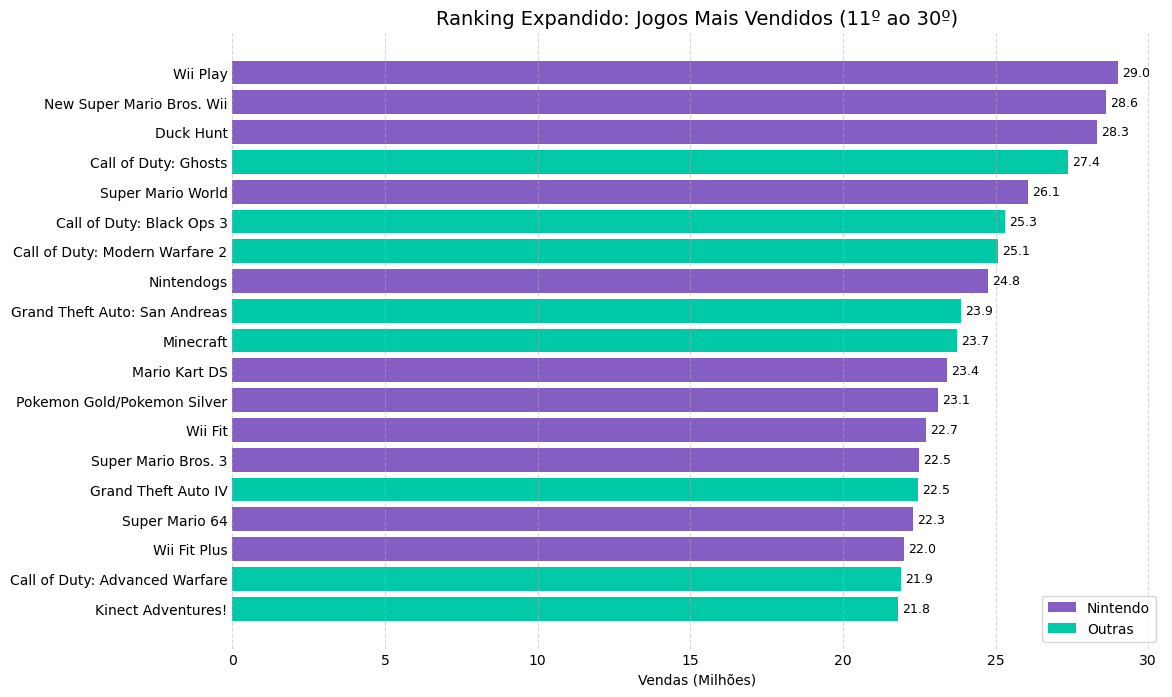

In [104]:
# Pegamos do 11º ao 30º (índices 11 a 30)
top_11_50 = ranking_geral.iloc[11:30].sort_values('Total_vendas', ascending=True)
cores_jogos = ['#845EC2' if pub == 'Nintendo' else '#00c9a7' for pub in top_11_50['Publicadora']]

plt.figure(figsize=(12, 8))
barras = plt.barh(top_11_50['Jogo'], top_11_50['Total_vendas'], color=cores_jogos)

plt.title('Ranking Expandido: Jogos Mais Vendidos (11º ao 30º)', fontsize=14)
plt.xlabel('Vendas (Milhões)')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tick_params(axis='both', which='both', length=0)
plt.box(False)
plt.bar_label(barras, fmt='%.1f', padding=3, fontsize=9)
plt.legend(handles=legend_elements, loc='lower right')

plt.show()

### 🔫 A Ascensão dos Shooters e a Diversidade
Ao olharmos para além do Top 10, a diversidade de publicadoras e gêneros aumenta significativamente:

* **A Era do Tiro (Call of Duty):** O destaque absoluto desta faixa é a franquia **Call of Duty**. Vários títulos da série (como *Modern Warfare 3, Black Ops II*) aparecem consistentemente entre 3s 50 mais vendidos. Isso demonstra a eficácia do modelo de lançamentos anuais da Activision.
* **O Peso da Nintendo Continua:** Mesmo fora do Top 10, a Nintendo marca presença massiva com diversas iterações de **Pokémon**, **Mario Kart** e **New Super Mario Bros**, mostrando que suas franquias secundárias vendem tanto quanto os maiores hits das concorrentes.
* **Diversificação de Gêneros:** Diferente do topo (focado em família/casual), aqui vemos a entrada forte de jogos de **RPG** (*Skyrim, Pokémon*) e **Simulação** (*The Sims, Nintendogs*), refletindo gostos variados do público global.

--------

# 🚀 Conclusão do Projeto: O Que os Dados Realmente Nos Contam?

Chegamos ao fim da nossa jornada pelos dados da indústria de videogames (1980-2016). Mais do que apenas gerar gráficos coloridos, este projeto teve como objetivo simular um ciclo real de Data Science, transformando linhas de uma tabela crua em inteligência de mercado.

Para fechar, vamos recapitular como construímos esse raciocínio e quais foram as grandes descobertas.

1. A "Cozinha" dos Dados (ETL & Preparação) 🛠️
Antes de qualquer análise, "botamos a mão na massa". O dataset original, embora rico, precisava de ajustes para contar a história certa:

Limpeza e Tradução: Renomeamos colunas técnicas para termos amigáveis (ex: Global_Sales virou Total_vendas), facilitando a leitura por qualquer público.

Agrupamentos Inteligentes: O "pulo do gato" foi perceber que analisar jogos soltos distorcia a realidade. Criamos agrupamentos por Nome (para somar vendas de jogos multiplataforma como GTA V) e por Região (para entender gostos locais).

Tratamento de Escala: Ajustamos escalas (bilhões/milhões) para que os números fizessem sentido visualmente.

2. A Estrutura da Narrativa (Storytelling) 📖
Não jogamos os gráficos de qualquer jeito. Adotamos a estratégia do "Funil Analítico", descendo do macro para o micro:

O Hardware (Plataformas): Onde as pessoas jogam?

As Empresas (Publicadoras): Quem produz os jogos?

O Conteúdo (Gêneros): O que as pessoas gostam de jogar?

O Fator Humano (Regiões): Como a cultura influencia a compra?

Os Ídolos (Top Jogos): Quais títulos marcaram a história?

Além disso, em cada etapa aplicamos a lógica de Oferta vs. Demanda (Comparando gráficos de Contagem com gráficos de Soma), o que nos permitiu ver quem "trabalha mais" vs. quem "lucra mais".

3. Os Grandes Insights (O "Suco" dos Dados) 🍊
Ao cruzarmos todas essas informações, derrubamos mitos e confirmamos tendências:

👑 A Coroa é da Sony, a Magia é da Nintendo: Enquanto a família PlayStation (PS2, PS3) demonstrou uma consistência absurda e liderança em volume total global, a Nintendo provou ser a "rainha da eficiência". Seus jogos exclusivos dominam o Top 10 histórico, mostrando que ela não precisa de muitas plataformas para vender bilhões.

🏭 Fábrica vs. Artesanato: Descobrimos que a Electronic Arts (EA) é uma máquina de produção, liderando em quantidade de jogos lançados. Porém, ao olharmos para o lucro por unidade, a Nintendo supera todos. Isso ilustra duas estratégias de negócio válidas: ganhar no volume (EA) ou na margem/exclusividade (Nintendo).

🎎 O "Muro" Cultural do Japão: A análise regional foi um choque de realidade. O mercado não é homogêneo.

Ocidente (EUA/Europa): Ama Ação, Tiro e Esportes. É onde o Xbox e os blockbusters cinematográficos brilham.

Oriente (Japão): Vive em um ecossistema à parte, dominado por RPGs e portáteis. O fracasso do Xbox lá e o sucesso estrondoso do Nintendo DS mostram que estratégias globais únicas falham se ignorarem a cultura local.

🔫 A Ascensão do Tiro e a Queda da Aventura: Vimos que gêneros como "Aventura" têm muitos jogos lançados, mas vendem pouco (mercado saturado de jogos pequenos). Por outro lado, "Shooter" (Tiro) tem menos lançamentos, mas vendas explosivas, impulsionado pela era do multiplayer online (Call of Duty).

# 4. Veredito Final 🏁
Este projeto comprovou que a indústria de games é cíclica, regionalizada e movida por sucessos. Não existe uma "bala de prata": para ter sucesso, uma empresa precisa entender se seu público quer a complexidade de um RPG japonês ou a adrenalina de um jogo de ação americano.

Os dados nos mostraram que, no fim do dia, conteúdo é rei, mas a distribuição (plataforma) é quem dita as regras do reino.